In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math

In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import distances
#import matplotlib.font_manager as font_manager

In [ ]:
from plgapeg_MD_analysis import (pers_length, get_rg_pers_poly, bavg_pers_cnt, pos_bead_autocorr_RA,
                                 rouse_relax, zimm_relax_fit, zimm_relax_func, rh_block_avg, mean_sq_e2e, hydro_rad_poly,
                                obs_autocorr_RA)

In [4]:
from plgapeg_MD_analysis import (obs_autocorr_RA, get_rg_pers_poly,rh_block_avg, 
                                 mean_sq_e2e, hydro_rad_poly)

In [ ]:
from polymer_MD_analysis import (pers_length, get_rg_pers_poly, bavg_pers_cnt, pos_bead_autocorr_RA,
                                 rouse_relax, zimm_relax_fit, zimm_relax_func, rh_block_avg, mean_sq_e2e, hydro_rad_poly,
                                obs_autocorr_RA, getPairStats, pair_regression, simple_regression_conf)

## PLGA-PEG/acetone system analysis

### N = 6 PLGA-PEG/acetone 

In [ ]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_plgapeg_ace = mda.Universe("n6plga_peg_ace/n6plgapeg_ACE.pdb", "n6plga_peg_ace/NoAce_n6plgapeg.xtc")

In [ ]:
n6_plgapeg_ace.trajectory

In [ ]:
len(n6_plgapeg_ace.trajectory)

In [ ]:
#Select the polymer heavy atoms 
plgapeg_n6ace = n6_plgapeg_ace.select_atoms("resname sPLG PLG bPLG bPEG PEG sPEG and not type H")

In [ ]:
np.unique(plgapeg_n6ace.resids)

In [ ]:
# Get cosine theta values at frame 0 
crv_n6plgapeg_ace = pers_length(plgapeg_n6ace,6)
crv_n6plgapeg_ace

### Orientation Order parameter vs. time 

In [ ]:
n_mon = 6 
start = 0
end = 36001

In [ ]:
OOp_n6plgapeg_ace = orientation_order_param(plgapeg_n6ace, n6_plgapeg_ace, n_mon, start, end)

In [ ]:
OOp_n6plgapeg_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6plgapeg_ace,linewidth=2, color='teal')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(-1,1)

#### Mean Orientation Order Parameter for N = 6 PLGA-PEG in acetone

In [ ]:
OOp_n6plgapeg_ace[82]

In [ ]:
OOp_n6plgapeg_ace[239]

In [ ]:
np.mean(OOp_n6plgapeg_ace)

In [ ]:
np.std(OOp_n6plgapeg_ace)

### Mean squared end to end distance 

In [ ]:
n_mon = 6 
start = 0
end = 36001

In [ ]:
eVec_n6plgapeg_ace, e2edis_n6plgapeg_ace = mean_sq_e2e(plgapeg_n6ace, n6_plgapeg_ace, n_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6plgapeg_ace[1]/10,linewidth=2, color='teal')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,2)

#### Ree Autocorrelation function

In [ ]:
e2edis_n6plgapeg_ace[1]

In [8]:
t_corr = 7000
window_shift = 9

In [ ]:
ACn6plgapegace_Ree, eqvar_n6plgapegace = obs_autocorr_RA(e2edis_n6plgapeg_ace[1],t_corr, window_shift,start,end)

In [ ]:
ACn6plgapegace_Ree

In [ ]:
eqvar_n6plgapegace

In [ ]:
ACn6plgapegace_sqRee, evsqRee_n6plgapegace = obs_autocorr_RA(e2edis_n6plgapeg_ace[0],t_corr, window_shift,start,end)

In [ ]:
np.sqrt(evsqRee_n6plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Ree autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Ree[1]/100, ACn6plgapegace_Ree[0],linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Ree'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

### Hydrodynamic Radius vs time

In [9]:
n_mon = 6 
start = 0
end = 36001

In [ ]:
plgapegn6ace_rh = hydro_rad_poly(plgapeg_n6ace, n6_plgapeg_ace, n_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, plgapegn6ace_rh/10,linewidth=2, color='teal')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,2)

#### Rh autocorrelation

In [10]:
ACn6plgapegaceRh, eqvarRh_n6plgapegace = obs_autocorr_RA(plgapegn6ace_rh,t_corr, window_shift,start,end)

No. of Samples: 3223


In [11]:
ACn6plgapegaceRh

array([[ 1.00000000e+00,  8.96882185e-01,  8.96803923e-01, ...,
        -6.88553343e-02, -7.13330004e-02, -2.28556856e-02],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [12]:
eqvarRh_n6plgapegace

2.5639625160636967

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Rh autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{Rh}(t)$', fontsize=15)
plt.plot(ACn6plgapegaceRh[1]/100, ACn6plgapegaceRh[0],linewidth=2, color='#1F2E69')
#plt.plot(ACn6plgapegace_Ree[1]/100, ACn6plgapegace_Ree[0],linewidth=2, color='r')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,70)
#plt.ylim(-0.2,1)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n_mon = 6 
start = 0
end = 36001
t_corr = 1000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_plgapegn6ace, tcSUM_plgapegn6ace = pos_bead_autocorr_RA(plgapeg_n6ace, n6_plgapeg_ace, n_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_plgapegn6ace

In [ ]:
tcSUM_plgapegn6ace.shape

### Fitting autocorrelation data 

In [ ]:
tcRA_plgapegn6ace = np.load('n6ppace_CtRA.npy', allow_pickle=True)
tcRA_plgapegn8ace = np.load('n8ppace_CtRA.npy', allow_pickle=True)
tcRA_plgapegn10ace = np.load('n10ppace_CtRA.npy', allow_pickle=True)
tcRA_plgapegn16ace = np.load('n16ppace_CtRA.npy', allow_pickle=True)
tcRA_plgapegn20ace = np.load('n20ppace_CtRA.npy', allow_pickle=True)
tcRA_plgapegn30ace = np.load('n30ppace_CtRA.npy', allow_pickle=True)

In [ ]:
s_n6 =[2 for i in range(tcRA_plgapegn6ace[1].shape[0])]
s_n8 =[2 for i in range(tcRA_plgapegn8ace[1].shape[0])]
s_n10 =[2 for i in range(tcRA_plgapegn10ace[1].shape[0])]
s_n16 =[2 for i in range(tcRA_plgapegn16ace[1].shape[0])]
s_n20 =[2 for i in range(tcRA_plgapegn20ace[1].shape[0])]
s_n30 =[2 for i in range(tcRA_plgapegn30ace[1].shape[0])]

In [ ]:
len(s_n30)

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(tcRA_plgapegn6ace[1]/100, tcRA_plgapegn6ace[0], color='teal', s=s_n6, label=r'$N_{PLGA-PEG}$ = 6')
plt.scatter(tcRA_plgapegn8ace[1]/100, tcRA_plgapegn8ace[0], color='dodgerblue', s=s_n8, label=r'$N_{PLGA-PEG}$ = 8')
plt.scatter(tcRA_plgapegn10ace[1]/100, tcRA_plgapegn10ace[0], color='darkmagenta', s=s_n10, label=r'$N_{PLGA-PEG}$ = 10')
plt.scatter(tcRA_plgapegn16ace[1]/100, tcRA_plgapegn16ace[0], color='maroon', s=s_n16, label=r'$N_{PLGA-PEG}$ = 16')
plt.scatter(tcRA_plgapegn20ace[1]/100, tcRA_plgapegn20ace[0], color='orangered', s=s_n20, label=r'$N_{PLGA-PEG}$ = 20')
plt.scatter(tcRA_plgapegn30ace[1]/100, tcRA_plgapegn30ace[0], color='darkolivegreen', s=s_n30, label=r'$N_{PLGA-PEG}$ = 30')
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
xdata_plgapegn6ace = tcRA_plgapegn6ace[1]/100
ydata_plgapegn6ace = tcRA_plgapegn6ace[0]

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rouse_relax(1, 2, 6)

In [ ]:
ts = 1
hs = 0.1
n_mon = 6
n_b = n_mon - 1
tr1 = 2
zimm_relax_fit(ts,tr1,hs,n_b)

In [ ]:
zimm_relax_func(1, 2, 0.1, 5)

In [ ]:
def res_plgapegn6ace(variabls, xnp, ynp):
    #hs_np = variabls['h_star']
    hs_np = 0.26
    tr1_np = variabls['t_first']
    n_bonds = 5
    testnp = []
    for i in range(len(xnp)):
        model_ynp = zimm_relax_fit(xnp[i], tr1_np, hs_np, n_bonds)
        #model_ynp = rouse_relax(xnp[i], tr1_np, n_m)
        testnp.append(ynp[i] - model_ynp)
    
    tt_n6 = np.array(testnp)

    return tt_n6
    
#x1 = np.array([0,0])
#pfit, pcov, infodict, errmsg, success = leastsq(res_poly, x1, args=(xdata, ydata), full_output=1)

In [ ]:
from lmfit import Minimizer, Parameters, report_fit

In [ ]:
ppfit_n6ace = Parameters()
#ppfit_n6ace.add(name='h_star', value=0, min=0, max=0.26, vary=True)
ppfit_n6ace.add(name='t_first', value=2)

In [ ]:
mini_ppn6ace = Minimizer(res_plgapegn6ace, ppfit_n6ace, fcn_args=(xdata_plgapegn6ace, ydata_plgapegn6ace))
out_ppn6ace = mini_ppn6ace.leastsq()
#bfit_n10 = ydata_n10ace + out_n10ace.residual 

In [ ]:
report_fit(out_ppn6ace.params)

In [ ]:
out_ppn6ace.params

In [ ]:
# with h varying, tr = 0.36816293 +/- 0.00276373, h* = 0.25999898 +/- 0.04397632
tace_n6plgapeg = []
n_bonds = 5
for i in range(len(xdata_plgapegn6ace)):
    tace_n6plgapeg.append(zimm_relax_fit(xdata_plgapegn6ace[i], 0.36841223, 0.26,  n_bonds))


In [ ]:
t_c, tz_n6plgapeg, zimm_n6plgapeg, rouse_n6plgapeg = zimm_relax_func(1, 0.36841223, 0.26,  n_bonds)

In [ ]:
x_pos = np.arange(5)
width = 0.25
aa_types = [r"$\tau_{1}$", r"$\tau_{2}$", r"$\tau_{3}$", r"$\tau_{4}$", r"$\tau_{5}$"]
fig = plt.figure(figsize=(7,7))
plt.bar(x_pos, tz_n6plgapeg, width, ecolor='black',capsize=5, color='c')
plt.xticks(x_pos, labels=aa_types, fontsize=12)
plt.ylabel(r'Relaxation times', fontsize=15)

In [ ]:
x_pos = np.arange(5)
width = 0.25
aa_eigen_ppn6ace = [r"$a_{1}$", r"$a_{2}$", r"$a_{3}$", r"$a_{4}$", r"$a_{5}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA PEG in acetone N = 6', fontsize=18)
plt.bar(x_pos, rouse_n6plgapeg, width, ecolor='black',capsize=5, color='c', label='Rouse' )
plt.bar(x_pos+width, zimm_n6plgapeg, width,ecolor='black',capsize=5, color='m', label='Zimm')
plt.xticks(x_pos, labels=aa_eigen_ppn6ace, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Rouse and Zimm eigenvalues', fontsize=15)

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.plot(xdata_plgapegn6ace, tace_n6plgapeg, color='teal')
plt.title(r'Positional bead autocorrelation PLGA PEG in acetone', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rppace_msen6 = np.array([ydata_plgapegn6ace - np.array(tace_n6plgapeg)])
#rpace_msen6

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, rppace_msen6, color='teal', s=s_n6)
plt.title(r'Relaxation time Fitting Residuals PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,100])
plt.ylim([-0.7,1])
plt.tick_params(labelsize=15)

### Radius of Gyration vs. time N = 6 PLGA-PEG in acetone

In [ ]:
# Key variables 
n_mon = 6 
start = 0
end = 36001

In [ ]:
n6plgapeg_rgens_ace, cor_n6plgapeg_ace, N6plgapeg_cos_ace, rgace_n6plgapeg = get_rg_pers_poly(plgapeg_n6ace, n6_plgapeg_ace,
                                                                                                  start,end)

In [ ]:
n6plgapeg_rgens_ace[0].shape

In [ ]:
cor_n6plgapeg_ace[3]

In [ ]:
N6plgapeg_cos_ace

In [ ]:
rgace_n6plgapeg

In [ ]:
n6plgapeg_rgens_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plgapeg_rgens_ace[0]/10,linewidth=2, color='teal')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0.2,2)

#### Rg Autocorrelation

In [70]:
ACn6plgapegace_Rg, eqvarRg_n6plgapegace = obs_autocorr_RA(n6plgapeg_rgens_ace[0],t_corr, window_shift,start,end)

No. of Samples: 3223


In [71]:
ACn6plgapegace_Rg

array([[1.00000000e+00, 9.50670016e-01, 9.48711268e-01, ...,
        9.14609385e-02, 9.00264543e-02, 1.06720059e-01],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        6.99700000e+03, 6.99800000e+03, 6.99900000e+03]])

In [72]:
eqvarRg_n6plgapegace

0.824179813914828

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Rg[1]/100, ACn6plgapegace_Rg[0],linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Rg'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

#### Get average COM distance, Arc length values

In [ ]:
cb_n6plga = np.zeros(shape=(36001))
cb_n6pplinker = np.zeros(shape=(36001))
cb_n6plgapeg = np.zeros(shape=(36001))
count = 0
for ts in n6_plgapeg_ace.trajectory[0:36001]:
    # 1st two PLGA residues
    n6m1_plga = n6_plgapeg_ace.select_atoms("resid 1")
    n6m2_plga = n6_plgapeg_ace.select_atoms("resid 2")
    # PLGA-PEG linker
    n6pl_link = n6_plgapeg_ace.select_atoms("resid 3")
    n6plgapeg_link = n6_plgapeg_ace.select_atoms("resid 4")
    # last two PEG residues 
    n6l1_peg = n6_plgapeg_ace.select_atoms("resid 5")
    n6l2_peg = n6_plgapeg_ace.select_atoms("resid 6")
    
    cb_n6plga[count] = mda.analysis.distances.distance_array(n6m1_plga.center_of_mass(), n6m2_plga.center_of_mass(), 
                                                   box=n6_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n6pplinker[count] = mda.analysis.distances.distance_array(n6pl_link.center_of_mass(), n6plgapeg_link.center_of_mass(), 
                                                   box=n6_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n6plgapeg[count] = mda.analysis.distances.distance_array(n6l1_peg.center_of_mass(), n6l2_peg.center_of_mass(), 
                                                   box=n6_plgapeg_ace.trajectory.ts.dimensions)
    
    count += 1
    

    

In [ ]:
COM_ppn6ace = np.zeros(shape=(3,2))
COM_ppn6ace[0,0] = np.mean(cb_n6plga)
COM_ppn6ace[1,0] = np.mean(cb_n6pplinker)
COM_ppn6ace[2,0] = np.mean(cb_n6plgapeg)
COM_ppn6ace[0,1] = np.std(cb_n6plga)
COM_ppn6ace[1,1] = np.std(cb_n6pplinker)
COM_ppn6ace[2,1] = np.std(cb_n6plgapeg)
COM_ppn6ace

#### Correlation values at each arc length from the whole 360 ns trajectory, N = 6 PLGA-PEG/acetone

In [ ]:
# x values
blen_ppn6ace = np.zeros(shape=5)
for i in range(n_mon-1):
    if i < int((n_mon/2)-1):
        # PLGA contour length values
        if i == 0:
            blen_ppn6ace[i] = 0
        elif i != 0:
            blen_ppn6ace[i] =  np.sum(blen_ppn6ace[i-1]) + COM_ppn6ace[0,0]    
    elif i == int((n_mon/2)-1):
        #PLGA-PEG linker length
        blen_ppn6ace[i] = np.sum(blen_ppn6ace[i-1]) + COM_ppn6ace[1,0]
    elif i > int((n_mon/2)-1):
    #    # PEG contour length values
        blen_ppn6ace[i] = np.sum(blen_ppn6ace[i-1]) + COM_ppn6ace[2,0]
        
blen_ppn6ace

In [ ]:
# Error prop. into natural log std deviation
mk_n6ppace = cor_n6plgapeg_ace[1]/cor_n6plgapeg_ace[0]
mk_n6ppace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, np.log(cor_n6plgapeg_ace[0]), yerr=mk_n6ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
# All the points give the best fits for N = 6 peg in acetone
n6_blksplgapeg_ace , n6plgapeg_lpace = bavg_pers_cnt(5, plgapeg_n6ace, n6_plgapeg_ace, blen_ppn6ace, 3, 0 , 36001)

In [ ]:
n6_blksplgapeg_ace

In [ ]:
n6plgapeg_lpace

In [ ]:
n6plgapeg_lpace[2]

In [ ]:
np.mean(n6plgapeg_lpace[3])

#### line fitted to cosine theta values using mean slope

In [ ]:
def line_fit(slope, x):
    return slope*x 

In [ ]:
blen_ppn6ace

In [ ]:
gg_n6plgapeg_ace = line_fit(np.mean(n6plgapeg_lpace[2]),blen_ppn6ace)

In [ ]:
gg_n6plgapeg_ace

#### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 6 PLGA-PEG/acetone

In [ ]:
blppn6ace = []
for i in range(n_mon-1):
    if i < int((n_mon/2)-1):
        # PLGA contour length values
        blppn6ace.append(COM_ppn6ace[0,0])    
    elif i == int((n_mon/2)-1):
        #PLGA-PEG linker length
        blppn6ace.append(COM_ppn6ace[1,0]) 
    elif i > int((n_mon/2)-1):
    #    # PEG contour length values
        blppn6ace.append(COM_ppn6ace[2,0]) 

# Contour Length, N = 6 PLGA-PEG in acetone
lc_ppn6ace = np.sum(blppn6ace)
lc_ppn6ace

In [ ]:
# Ree^2/Rg^2 array at different contour lengths
re2e_rgsq_plgapegace = np.zeros(shape=(3,6))
re2e_rgsq_plgapegace[1,0] = lc_ppn6ace
re2e_rgsq_plgapegace

In [ ]:
a_ppn6ace = np.mean(n6_blksplgapeg_ace['Avg Sq. end to end distance'])

In [ ]:
b_ppn6ace = np.mean(n6_blksplgapeg_ace['Avg Sq. radius of gyration'])

In [ ]:
re2e_rgsq_plgapegace[0,0] = a_ppn6ace/b_ppn6ace
re2e_rgsq_plgapegace

In [ ]:
# Rg/Rh array at different contour lengths 
rhy_rg_plgapegace = np.zeros(shape=(3,6))
rhy_rg_plgapegace[1,0] = lc_ppn6ace
rhy_rg_plgapegace

In [ ]:
aa_ppn6ace = np.mean(n6_blksplgapeg_ace['Avg Radius of gyration'])

In [ ]:
bb_ppn6ace = np.mean(n6_blksplgapeg_ace['Avg Hydrodynamic radius'])

In [ ]:
rhy_rg_plgapegace[0,0] = aa_ppn6ace/bb_ppn6ace
rhy_rg_plgapegace

In [ ]:
# Kuhn length array at different monomer lengths
kuhnlpL_plgapegace = np.zeros(shape=(3,6))
kuhnlpL_plgapegace[1] = np.array([6,8,10,16,20,30])
kuhnlpL_plgapegace

In [ ]:
# pers length/contour length 
kuhnlpL_plgapegace[0,0] = np.mean(n6_blksplgapeg_ace["Avg persistence length"])/lc_ppn6ace
kuhnlpL_plgapegace

#### Block averaged Radius of gyration and persistence length, N = 6 PLGA-PEG/acetone

In [ ]:
np.mean(n6_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.std(n6_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.mean(n6_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
np.std(n6_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, np.log(cor_n6plgapeg_ace[0]), yerr=mk_n6ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ppn6ace, gg_n6plgapeg_ace, color='teal')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.legend([r'$N_{PLGA-PEG}$ = 6: $L_{p}$ = 24.7 $\AA$ ± 1.34 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
#plt.text(0.5, -6.94,r'$N_{PEG}$ = 6: $L_{p}$ = 18.8 $\AA$ ± 3.61 $\AA$', fontsize=15, color='#1F2E69')

In [ ]:
rgplgapeg_olig_ace =  pd.DataFrame(data=n6_blksplgapeg_ace["Avg Radius of gyration"], columns=['$R_{g}$ [Angstrom] N = 6 PLGA-PEG acetone'])
rgplgapeg_olig_ace

In [ ]:
pers_plgapegt_ace = pd.DataFrame(data=n6_blksplgapeg_ace["Avg persistence length"], columns=[r"$L_{p}$ [Angstrom] N = 6 PLGA-PEG acetone"])
pers_plgapegt_ace

### N = 8 PLGA-PEG/acetone 

In [ ]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_plgapeg_ace = mda.Universe("n8plga_peg_ace/n8plgapeg_ACE.pdb", "n8plga_peg_ace/NoAce_n8plgapeg.xtc")

In [ ]:
n8_plgapeg_ace.trajectory

In [ ]:
len(n8_plgapeg_ace.trajectory)

In [ ]:
#Select the polymer heavy atoms 
plgapeg_n8ace = n8_plgapeg_ace.select_atoms("resname sPLG PLG bPLG bPEG PEG sPEG and not type H")

In [ ]:
np.unique(plgapeg_n8ace.resids)

In [ ]:
# Get cosine theta values at frame 0 
crv_n8plgapeg_ace = pers_length(plgapeg_n8ace,8)
crv_n8plgapeg_ace

### Orientation Order parameter vs. time 

In [ ]:
n8_mon = 8 
start = 0
end = 36001

In [ ]:
OOp_n8plgapeg_ace = orientation_order_param(plgapeg_n8ace, n8_plgapeg_ace, n8_mon, start, end)

In [ ]:
OOp_n8plgapeg_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6plgapeg_ace,linewidth=2, color='teal')
plt.plot(trj_len/100, OOp_n8plgapeg_ace,linewidth=2, color='dodgerblue')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(-1,1)

#### Mean Orientation Order Parameter for N = 8 PLGA-PEG in acetone

In [ ]:
OOp_n8plgapeg_ace[82]

In [ ]:
OOp_n8plgapeg_ace[239]

In [ ]:
np.mean(OOp_n8plgapeg_ace)

In [ ]:
np.std(OOp_n8plgapeg_ace)

### Mean squared end to end distance 

In [ ]:
eVec_n8plgapeg_ace, e2edis_n8plgapeg_ace = mean_sq_e2e(plgapeg_n8ace, n8_plgapeg_ace, n8_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6plgapeg_ace[1]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, e2edis_n8plgapeg_ace[1]/10,linewidth=2, color='dodgerblue')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,8)

#### Ree Autocorrelation function

In [ ]:
e2edis_n8plgapeg_ace[1]

In [ ]:
ACn8plgapegace_Ree, eqvar_n8plgapegace = obs_autocorr_RA(e2edis_n8plgapeg_ace[1],t_corr, window_shift,start,end)

In [ ]:
ACn8plgapegace_Ree

In [ ]:
eqvar_n8plgapegace

In [ ]:
ACn8plgapegace_sqRee, evsqRee_n8plgapegace = obs_autocorr_RA(e2edis_n8plgapeg_ace[0],t_corr, window_shift,start,end)

In [ ]:
np.sqrt(evsqRee_n8plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Ree autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Ree[1]/100, ACn6plgapegace_Ree[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Ree[1]/100, ACn8plgapegace_Ree[0],linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Ree','N = 8 Ree'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

### Hydrodynamic Radius vs time

In [ ]:
plgapegn8ace_rh = hydro_rad_poly(plgapeg_n8ace, n8_plgapeg_ace, n8_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, plgapegn6ace_rh/10,linewidth=2, color='teal')
plt.plot(trj_len/100, plgapegn8ace_rh/10,linewidth=2, color='dodgerblue')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,6)

#### Rh autocorrelation

In [13]:
t_corr = 7000
window_shift = 9

In [14]:
ACn8plgapegaceRh, eqvarRh_n8plgapegace = obs_autocorr_RA(plgapegn8ace_rh,t_corr, window_shift,start,end)

No. of Samples: 3223


In [15]:
ACn8plgapegaceRh

array([[1.00000000e+00, 9.53174643e-01, 9.17427615e-01, ...,
        1.12647461e+00, 1.17689272e+00, 1.11358910e+00],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        6.99700000e+03, 6.99800000e+03, 6.99900000e+03]])

In [16]:
eqvarRh_n8plgapegace

3.5094915104910456

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Rh autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{Rh}(t)$', fontsize=15)
plt.plot(ACn6plgapegaceRh[1]/100, ACn6plgapegaceRh[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegaceRh[1]/100, ACn8plgapegaceRh[0],linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone'], frameon=False, fontsize=14)
plt.xlim(0,70)
#plt.ylim(-0.2,1)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n8_mon = 8 
start = 0
end = 36001
t_corr = 1000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_plgapegn8ace, tcSUM_plgapegn8ace = pos_bead_autocorr_RA(plgapeg_n8ace, n8_plgapeg_ace, n8_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_plgapegn8ace

In [ ]:
tcSUM_plgapegn8ace.shape

### Fitting autocorrelation data 

In [ ]:
xdata_plgapegn8ace = tcRA_plgapegn8ace[1]/100
ydata_plgapegn8ace = tcRA_plgapegn8ace[0]

In [ ]:
ydata_plgapegn8ace.shape

In [ ]:
xdata_plgapegn8ace.shape

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rouse_relax(1, 2, 6)

In [ ]:
ts = 1
hs = 0.1
n8_mon = 8
n_b = n8_mon - 1
tr1 = 2
zimm_relax_fit(ts,tr1,hs,n_b)

In [ ]:
zimm_relax_func(ts,tr1,hs,n_b)

In [ ]:
def res_plgapegn8ace(variabls, xnp, ynp):
    #hs_np = variabls['h_star']
    hs_np = 0.26
    tr1_np = variabls['t_first']
    n_bonds = 7
    testnp = []
    for i in range(len(xnp)):
        model_ynp = zimm_relax_fit(xnp[i], tr1_np, hs_np, n_bonds)
        #model_ynp = rouse_relax(xnp[i], tr1_np, n_m)
        testnp.append(ynp[i] - model_ynp)
    
    tt_n6 = np.array(testnp)

    return tt_n6
    
#x1 = np.array([0,0])
#pfit, pcov, infodict, errmsg, success = leastsq(res_poly, x1, args=(xdata, ydata), full_output=1)

In [ ]:
ppfit_n8ace = Parameters()
#ppfit_n8ace.add(name='h_star', value=0, min=0, max=0.26, vary=True)
ppfit_n8ace.add(name='t_first', value=2)

In [ ]:
mini_ppn8ace = Minimizer(res_plgapegn8ace, ppfit_n8ace, fcn_args=(xdata_plgapegn8ace, ydata_plgapegn8ace))
out_ppn8ace = mini_ppn8ace.leastsq()
#bfit_n10 = ydata_n10ace + out_n10ace.residual 

In [ ]:
report_fit(out_ppn8ace.params)

In [ ]:
out_ppn8ace.params

In [ ]:
# with h varying, tr = 0.64347526 +/- 0.00424774, h* = 0.25999916 +/- 0.02254159
tace_n8plgapeg = []
n_bonds = 7
for i in range(len(xdata_plgapegn8ace)):
    tace_n8plgapeg.append(zimm_relax_fit(xdata_plgapegn8ace[i], 0.64345497, 0.26,  n_bonds))


In [ ]:
t_c, tz_n8plgapeg, zimm_n8plgapeg, rouse_n8plgapeg = zimm_relax_func(1, 0.64345497, 0.26,  n_bonds)

In [ ]:
x_pos_n6 = np.arange(5)
x_pos_n8 = np.arange(7)
width = 0.25
aa_types_n8 = [r"$\tau_{1}$", r"$\tau_{2}$", r"$\tau_{3}$", r"$\tau_{4}$", r"$\tau_{5}$",r"$\tau_{6}$",r"$\tau_{7}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone', fontsize=18)
plt.bar(x_pos_n6+width, tz_n6plgapeg, width, ecolor='black',capsize=5, color='teal', label="N = 6")
plt.bar(x_pos_n8, tz_n8plgapeg, width, ecolor='black',capsize=5, color='dodgerblue', label='N = 8')
plt.xticks(x_pos_n6+width, labels=aa_types, fontsize=12)
plt.xticks(x_pos_n8, labels=aa_types_n8, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Relaxation times [ns]', fontsize=15)

In [ ]:
aa_eigen_n8 = [r"$a_{1}$", r"$a_{2}$", r"$a_{3}$", r"$a_{4}$", r"$a_{5}$",r"$a_{6}$",r"$a_{7}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone N = 8', fontsize=18)
plt.bar(x_pos_n8, rouse_n8plgapeg, width,ecolor='black',capsize=5, color='c', label='Rouse')
plt.bar(x_pos_n8+width, zimm_n8plgapeg, width,ecolor='black',capsize=5, color='m', label='Zimm')
plt.xticks(x_pos_n8+width,labels=aa_eigen_n8, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Rouse and Zimm eigenvalues', fontsize=15)

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.plot(xdata_plgapegn8ace, tace_n6plgapeg, color='teal')
plt.plot(xdata_plgapegn8ace, tace_n8plgapeg, color='dodgerblue')
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rppace_msen8 = np.array([ydata_plgapegn8ace - np.array(tace_n8plgapeg)])
#rpace_msen6

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, rppace_msen6, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, rppace_msen8, color='dodgerblue', s=s_n8)
plt.title(r'Relaxation time Fitting Residuals PlGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,100])
plt.ylim([-0.7,1])
plt.tick_params(labelsize=15)

#### Radius of Gyration vs. time N = 8 PLGA-PEG in acetone

In [ ]:
# Key variables 
n8_mon = 8 
start = 0
end = 36001

In [ ]:
n8plgapeg_rgens_ace, cor_n8plgapeg_ace, N8plgapeg_cos_ace, rgace_n8plgapeg = get_rg_pers_poly(plgapeg_n8ace, n8_plgapeg_ace,
                                                                                                  start,end)

In [ ]:
n8plgapeg_rgens_ace[0].shape

In [ ]:
cor_n8plgapeg_ace[3]

In [ ]:
N8plgapeg_cos_ace

In [ ]:
rgace_n8plgapeg

In [ ]:
n8plgapeg_rgens_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plgapeg_rgens_ace[0]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, n8plgapeg_rgens_ace[0]/10,linewidth=2, color='dodgerblue')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0.2,2)

#### Rg Autocorrelation

In [ ]:
t_corr = 4000
window_shift = 15

In [67]:
ACn8plgapegace_Rg, eqvarRg_n8plgapegace = obs_autocorr_RA(n8plgapeg_rgens_ace[0],t_corr, window_shift,start,end)

No. of Samples: 3223


In [68]:
ACn8plgapegace_Rg

array([[1.00000000e+00, 9.82994395e-01, 9.56775027e-01, ...,
        6.16211292e-01, 6.33780873e-01, 6.14909820e-01],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        6.99700000e+03, 6.99800000e+03, 6.99900000e+03]])

In [69]:
eqvarRg_n8plgapegace

1.6877726848765988

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Rg[1]/100, ACn6plgapegace_Rg[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Rg[1]/100, ACn8plgapegace_Rg[0],linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Rg','N = 8 Rg'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

#### Get average COM distance, Contour length calc

In [ ]:
cb_n8plga = np.zeros(shape=(36001))
cb_n8pplinker = np.zeros(shape=(36001))
cb_n8plgapeg = np.zeros(shape=(36001))
count = 0
for ts in n8_plgapeg_ace.trajectory[0:36001]:
    # 1st two PLGA residues
    n8m1_plga = n8_plgapeg_ace.select_atoms("resid 1")
    n8m2_plga = n8_plgapeg_ace.select_atoms("resid 2")
    # PLGA-PEG linker (n_mon/2 to get to bPLG res no.)
    n8pl_link = n8_plgapeg_ace.select_atoms("resid 4")
    n8plgapeg_link = n8_plgapeg_ace.select_atoms("resid 5")
    # last two PEG residues 
    n8l1_peg = n8_plgapeg_ace.select_atoms("resid 7")
    n8l2_peg = n8_plgapeg_ace.select_atoms("resid 8")
    
    cb_n8plga[count] = mda.analysis.distances.distance_array(n8m1_plga.center_of_mass(), n8m2_plga.center_of_mass(), 
                                                   box=n8_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n8pplinker[count] = mda.analysis.distances.distance_array(n8pl_link.center_of_mass(), n8plgapeg_link.center_of_mass(), 
                                                   box=n8_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n8plgapeg[count] = mda.analysis.distances.distance_array(n8l1_peg.center_of_mass(), n8l2_peg.center_of_mass(), 
                                                   box=n8_plgapeg_ace.trajectory.ts.dimensions)
    
    count += 1
    

    

In [ ]:
COM_ppn8ace = np.zeros(shape=(3,2))
COM_ppn8ace[0,0] = np.mean(cb_n8plga)
COM_ppn8ace[1,0] = np.mean(cb_n8pplinker)
COM_ppn8ace[2,0] = np.mean(cb_n8plgapeg)
COM_ppn8ace[0,1] = np.std(cb_n8plga)
COM_ppn8ace[1,1] = np.std(cb_n8pplinker)
COM_ppn8ace[2,1] = np.std(cb_n8plgapeg)
COM_ppn8ace

#### Correlation values at each arc length for the whole 360 ns trajectory, N = 8 PLGA-PEG/acetone

In [ ]:
# x values
blen_ppn8ace = np.zeros(shape=7)
for i in range(n8_mon-1):
    if i < int((n8_mon/2)-1):
        # PLGA contour length values
        if i == 0:
            blen_ppn8ace[i] = 0
        elif i != 0:
            blen_ppn8ace[i] = np.sum(blen_ppn8ace[i-1]) + COM_ppn8ace[0,0]    
    elif i == int((n8_mon/2)-1):
        #PLGA-PEG linker length
        blen_ppn8ace[i] = np.sum(blen_ppn8ace[i-1]) + COM_ppn8ace[1,0]
    elif i > int((n8_mon/2)-1):
    #    # PEG contour length values
        blen_ppn8ace[i] = np.sum(blen_ppn8ace[i-1]) + COM_ppn8ace[2,0]
        
blen_ppn8ace

In [ ]:
# Error prop. into natural log std deviation
mk_n8ppace = cor_n8plgapeg_ace[1]/cor_n8plgapeg_ace[0]
mk_n8ppace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn8ace, np.log(cor_n8plgapeg_ace[0]), yerr=mk_n8ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
# All the points give the best fits for N = 6 peg in acetone
n8_blksplgapeg_ace , n8plgapeg_lpace = bavg_pers_cnt(5, plgapeg_n8ace, n8_plgapeg_ace, blen_ppn8ace, 4, 0 , 36001)

In [ ]:
n8_blksplgapeg_ace

In [ ]:
n8plgapeg_lpace

In [ ]:
n8plgapeg_lpace[2]

In [ ]:
np.mean(n8plgapeg_lpace[3])

#### line fitted to cosine theta values using mean slope

In [ ]:
blen_ppn8ace

In [ ]:
gg_n8plgapeg_ace = line_fit(np.mean(n8plgapeg_lpace[2]),blen_ppn8ace)

In [ ]:
gg_n6plgapeg_n8ace = line_fit(np.mean(n6plgapeg_lpace[2]),blen_ppn8ace)

In [ ]:
gg_n8plgapeg_ace

#### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 8 PLGA-PEG in acetone

In [ ]:
blppn8ace = []
for i in range(n8_mon-1):
    if i < int((n8_mon/2)-1):
        # PLGA contour length values
        blppn8ace.append(COM_ppn8ace[0,0])    
    elif i == int((n8_mon/2)-1):
        #PLGA-PEG linker length
        blppn8ace.append(COM_ppn8ace[1,0]) 
    elif i > int((n8_mon/2)-1):
    #    # PEG contour length values
        blppn8ace.append(COM_ppn8ace[2,0]) 

# Contour Length, N = 6 PLGA-PEG in acetone
lc_ppn8ace = np.sum(blppn8ace)
lc_ppn8ace

In [ ]:
# Ree^2/Rg^2 array at different contour lengths
re2e_rgsq_plgapegace[1,1] = lc_ppn8ace
re2e_rgsq_plgapegace

In [ ]:
a_ppn8ace = np.mean(n8_blksplgapeg_ace['Avg Sq. end to end distance'])

In [ ]:
b_ppn8ace = np.mean(n8_blksplgapeg_ace['Avg Sq. radius of gyration'])

In [ ]:
re2e_rgsq_plgapegace[0,1] = a_ppn8ace/b_ppn8ace
re2e_rgsq_plgapegace

In [ ]:
# Rg/Rh array at different contour lengths 
rhy_rg_plgapegace[1,1] = lc_ppn8ace
rhy_rg_plgapegace

In [ ]:
aa_ppn8ace = np.mean(n8_blksplgapeg_ace['Avg Radius of gyration'])

In [ ]:
bb_ppn8ace = np.mean(n8_blksplgapeg_ace['Avg Hydrodynamic radius'])

In [ ]:
rhy_rg_plgapegace[0,1] = aa_ppn8ace/bb_ppn8ace
rhy_rg_plgapegace

In [ ]:
# pers length/contour length 
kuhnlpL_plgapegace[0,1] = np.mean(n8_blksplgapeg_ace["Avg persistence length"])/lc_ppn8ace
kuhnlpL_plgapegace

#### Block averaged Radius of gyration and persistence length, N = 8 PLGA-PEG in acetone

In [ ]:
np.mean(n8_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.std(n8_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.mean(n8_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
np.std(n8_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, np.log(cor_n6plgapeg_ace[0]), yerr=mk_n6ppace, color='teal', linestyle="None",marker='o',
             capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn8ace, np.log(cor_n8plgapeg_ace[0]), yerr=mk_n8ppace, color='dodgerblue', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ppn8ace, gg_n6plgapeg_n8ace, color='teal')
plt.plot(blen_ppn8ace, gg_n8plgapeg_ace, color='dodgerblue')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) PLGA-PEG in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,30)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 18.8 $\AA$ ± 3.60 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -5.9,r'$N_{PLGA-PEG}$ = 6: $L_{p}$ = 24.7 $\AA$ ± 1.34 $\AA$', fontsize=15, color='teal')
plt.text(0.5, -5.58,r'$N_{PLGA-PEG}$ = 8: $L_{p}$ = 27.3.0 $\AA$ ± 4.09 $\AA$', fontsize=15, color='dodgerblue')

In [ ]:
rgplgapeg_olig_ace[r"$R_{g}$ [Angstrom] N = 8 PLGA-PEG acetone"] = n8_blksplgapeg_ace["Avg Radius of gyration"]
rgplgapeg_olig_ace

In [ ]:
pers_plgapegt_ace[r"$L_{p}$ [Angstrom] N = 8 PLGA-PEG acetone"] = n8_blksplgapeg_ace["Avg persistence length"]
pers_plgapegt_ace

### N = 10 PLGA-PEG/acetone 

In [ ]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_plgapeg_ace = mda.Universe("n10plga_peg_ace/n10plgapeg_ACE.pdb", "n10plga_peg_ace/NoAce_n10plgapeg.xtc")

In [ ]:
n10_plgapeg_ace.trajectory

In [ ]:
len(n10_plgapeg_ace.trajectory)

In [ ]:
#Select the polymer heavy atoms 
plgapeg_n10ace = n10_plgapeg_ace.select_atoms("resname sPLG PLG bPLG bPEG PEG sPEG and not type H")

In [ ]:
np.unique(plgapeg_n10ace.resids)

In [ ]:
# Get cosine theta values at frame 0 
crv_n10plgapeg_ace = pers_length(plgapeg_n10ace,10)
crv_n10plgapeg_ace

### Orientation Order parameter vs. time 

In [17]:
n10_mon = 10 
start = 0
end = 36001

In [ ]:
OOp_n10plgapeg_ace = orientation_order_param(plgapeg_n10ace, n10_plgapeg_ace, n10_mon, start, end)

In [ ]:
OOp_n10plgapeg_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6plgapeg_ace,linewidth=2, color='teal')
plt.plot(trj_len/100, OOp_n8plgapeg_ace,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, OOp_n10plgapeg_ace,linewidth=2, color='darkmagenta')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(-1,1)

#### Mean Orientation Order Parameter for N = 10 PLGA-PEG in acetone

In [ ]:
OOp_n10plgapeg_ace[82]

In [ ]:
OOp_n10plgapeg_ace[239]

In [ ]:
np.mean(OOp_n10plgapeg_ace)

In [ ]:
np.std(OOp_n10plgapeg_ace)

### Mean squared end to end distance 

In [ ]:
eVec_n10plgapeg_ace, e2edis_n10plgapeg_ace = mean_sq_e2e(plgapeg_n10ace, n10_plgapeg_ace, n10_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6plgapeg_ace[1]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, e2edis_n8plgapeg_ace[1]/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, e2edis_n10plgapeg_ace[1]/10,linewidth=2, color='darkmagenta')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,5)

#### Ree Autocorrelation function

In [ ]:
e2edis_n10plgapeg_ace[1]

In [ ]:
t_corr = 7000
window_shift = 9

In [18]:
ACn10plgapegace_Ree, eqvar_n10plgapegace = obs_autocorr_RA(e2edis_n10plgapeg_ace[1],t_corr, window_shift,start,end)

No. of Samples: 3223


In [19]:
ACn10plgapegace_Ree

array([[ 1.00000000e+00,  9.84547444e-01,  9.74086576e-01, ...,
        -4.54273445e-03,  1.32093862e-03, -9.68905364e-03],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [20]:
eqvar_n10plgapegace

85.40286227433248

In [ ]:
ACn10plgapegace_sqRee, evsqRee_n10plgapegace = obs_autocorr_RA(e2edis_n10plgapeg_ace[0],t_corr, window_shift,start,end)

In [ ]:
np.sqrt(evsqRee_n10plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Ree autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Ree[1]/100, ACn6plgapegace_Ree[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Ree[1]/100, ACn8plgapegace_Ree[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegace_Ree[1]/100, ACn10plgapegace_Ree[0],linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Ree','N = 8 Ree','N = 10 Ree'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

### Hydrodynamic Radius vs time

In [ ]:
plgapegn10ace_rh = hydro_rad_poly(plgapeg_n10ace, n10_plgapeg_ace, n10_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, plgapegn6ace_rh/10,linewidth=2, color='teal')
plt.plot(trj_len/100, plgapegn8ace_rh/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, plgapegn10ace_rh/10,linewidth=2, color='darkmagenta')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,7)

#### Rh autocorrelation

In [ ]:
t_corr = 10000
window_shift = 9

In [38]:
ACn10plgapegaceRh, eqvarRh_n10plgapegace = obs_autocorr_RA(plgapegn10ace_rh,t_corr, window_shift,start,end)

No. of Samples: 3223


In [39]:
ACn10plgapegaceRh

array([[ 1.00000000e+00,  9.40618787e-01,  9.41543441e-01, ...,
        -4.33075251e-01, -4.23998494e-01, -4.51816752e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [40]:
eqvarRh_n10plgapegace

4.531451446507731

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Rh autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{Rh}(t)$', fontsize=15)
plt.plot(ACn6plgapegaceRh[1]/100, ACn6plgapegaceRh[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegaceRh[1]/100, ACn8plgapegaceRh[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegaceRh[1]/100, ACn10plgapegaceRh[0],linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone'], frameon=False, fontsize=14)
plt.xlim(0,100)
#plt.ylim(-0.2,1)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n10_mon = 10 
start = 0
end = 36001
t_corr = 1000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_plgapegn10ace, tcSUM_plgapegn10ace = pos_bead_autocorr_RA(plgapeg_n10ace, n10_plgapeg_ace, n10_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_plgapegn10ace

In [ ]:
tcSUM_plgapegn10ace.shape

### Fitting autocorrelation data 

In [ ]:
xdata_plgapegn10ace = tcRA_plgapegn10ace[1]/100
ydata_plgapegn10ace = tcRA_plgapegn10ace[0]

In [ ]:
ydata_plgapegn10ace.shape

In [ ]:
xdata_plgapegn10ace.shape

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
ts = 1
hs = 0.1
n10_mon = 10
n_b = n10_mon - 1
tr1 = 2
zimm_relax_fit(ts,tr1,hs,n_b)

In [ ]:
rouse_relax(1, 2, 6)

In [ ]:
zimm_relax_func(1, 2, 0.1, 5)

In [ ]:
def res_plgapegn10ace(variabls, xnp, ynp):
    #hs_np = variabls['h_star']
    hs_np = 0.26
    tr1_np = variabls['t_first']
    n_bonds = 9
    testnp = []
    for i in range(len(xnp)):
        model_ynp = zimm_relax_fit(xnp[i], tr1_np, hs_np, n_bonds)
        #model_ynp = rouse_relax(xnp[i], tr1_np, n_m)
        testnp.append(ynp[i] - model_ynp)
    
    tt_n6 = np.array(testnp)

    return tt_n6
    
#x1 = np.array([0,0])
#pfit, pcov, infodict, errmsg, success = leastsq(res_poly, x1, args=(xdata, ydata), full_output=1)

In [ ]:
ppfit_n10ace = Parameters()
#ppfit_n10ace.add(name='h_star', value=0, min=0, max=0.26, vary=True)
ppfit_n10ace.add(name='t_first', value=2)

In [ ]:
mini_ppn10ace = Minimizer(res_plgapegn10ace, ppfit_n10ace, fcn_args=(xdata_plgapegn10ace, ydata_plgapegn10ace))
out_ppn10ace = mini_ppn10ace.leastsq()
#bfit_n10 = ydata_n10ace + out_n10ace.residual 

In [ ]:
report_fit(out_ppn10ace.params)

In [ ]:
out_ppn10ace.params

In [ ]:
# with h varying, tr = 0.90670383 +/- 0.00581752, h* = 0.26000000 +/- 0.12476579
tace_n10plgapeg = []
n_bonds = 9
for i in range(len(xdata_plgapegn10ace)):
    tace_n10plgapeg.append(zimm_relax_fit(xdata_plgapegn10ace[i], 0.90674134, 0.26,  n_bonds))


In [ ]:
t_c, tz_n10plgapeg, zimm_n10plgapeg, rouse_n10plgapeg = zimm_relax_func(1,  0.90674134, 0.26,  n_bonds)

In [ ]:
len(tz_n10plgapeg)

In [ ]:
x_pos_n6 = np.arange(5)
x_pos_n8 = np.arange(7)
x_pos_n10 = np.arange(9)
width = 0.25
aa_types_n10 = [r"$\tau_{1}$", r"$\tau_{2}$", r"$\tau_{3}$", r"$\tau_{4}$", r"$\tau_{5}$",r"$\tau_{6}$",r"$\tau_{7}$",
           r"$\tau_{8}$", r"$\tau_{9}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone', fontsize=18)
plt.bar(x_pos_n6+(2*width), tz_n6plgapeg, width, ecolor='black',capsize=5, color='teal', label="N = 6")
plt.bar(x_pos_n8+(width), tz_n8plgapeg, width, ecolor='black',capsize=5, color='dodgerblue', label='N = 8')
plt.bar(x_pos_n10, tz_n10plgapeg, width, ecolor='black',capsize=5, color='darkmagenta', label='N = 10')
plt.xticks(x_pos_n10, labels=aa_types_n10, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Relaxation times [ns]', fontsize=15)

In [ ]:
aa_eigen_n10 = [r"$a_{1}$", r"$a_{2}$", r"$a_{3}$", r"$a_{4}$", r"$a_{5}$",r"$a_{6}$",r"$a_{7}$",r"$a_{8}$",
           r"$a_{9}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone N = 10', fontsize=18)
plt.bar(x_pos_n10, rouse_n10plgapeg, width,ecolor='black',capsize=5, color='c', label='Rouse')
plt.bar(x_pos_n10+width, zimm_n10plgapeg, width,ecolor='black',capsize=5, color='m', label='Zimm')
plt.xticks(x_pos_n10+width,labels=aa_eigen_n10, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Rouse and Zimm eigenvalues', fontsize=15)

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.plot(xdata_plgapegn6ace, tace_n6plgapeg, color='teal')
plt.plot(xdata_plgapegn8ace, tace_n8plgapeg, color='dodgerblue')
plt.plot(xdata_plgapegn10ace, tace_n10plgapeg, color='darkmagenta')
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rppace_msen10 = np.array([ydata_plgapegn10ace - np.array(tace_n10plgapeg)])
rppace_msen10

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, rppace_msen6, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, rppace_msen8, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, rppace_msen10, color='darkmagenta', s=s_n10)
plt.title(r'Relaxation time Fitting Residuals PLGA in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,100])
plt.ylim([-0.7,1])
plt.tick_params(labelsize=15)

#### Radius of Gyration vs. time N = 10 PLGA-PEG in acetone

In [ ]:
n10plgapeg_rgens_ace, cor_n10plgapeg_ace, N10plgapeg_cos_ace, rgace_n10plgapeg = get_rg_pers_poly(plgapeg_n10ace, n10_plgapeg_ace,
                                                                                                  start,end)

In [ ]:
n10plgapeg_rgens_ace[0].shape

In [ ]:
cor_n10plgapeg_ace[3]

In [ ]:
N10plgapeg_cos_ace

In [ ]:
rgace_n10plgapeg

In [ ]:
n10plgapeg_rgens_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plgapeg_rgens_ace[0]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, n8plgapeg_rgens_ace[0]/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, n10plgapeg_rgens_ace[0]/10,linewidth=2, color='darkmagenta')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone', 'N = 10 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0.2,2)

#### Rg Autocorrelation

In [ ]:
t_corr = 10000
window_shift = 9

In [63]:
ACn10plgapegace_Rg, eqvarRg_n10plgapegace = obs_autocorr_RA(n10plgapeg_rgens_ace[0],t_corr, window_shift,start,end)

No. of Samples: 3223


In [64]:
ACn10plgapegace_Rg

array([[ 1.00000000e+00,  9.52534106e-01,  9.42767257e-01, ...,
        -1.41050718e-01, -1.23746559e-01, -1.49516571e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [65]:
eqvarRg_n10plgapegace

2.6023149289972807

NameError: name 'ACn6plgapegace_Rg' is not defined

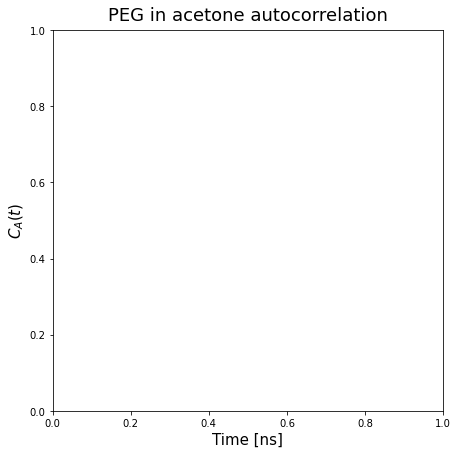

In [66]:
plt.figure(figsize=(7,7))
plt.title(r'PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Rg[1]/100, ACn6plgapegace_Rg[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Rg[1]/100, ACn8plgapegace_Rg[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegace_Rg[1]/100, ACn10plgapegace_Rg[0],linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Rg','N = 8 Rg','N = 10 Rg'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,100)
plt.ylim(-1,1)

#### Get average COM distance, arch length values

In [ ]:
cb_n10plga = np.zeros(shape=(36001))
cb_n10pplinker = np.zeros(shape=(36001))
cb_n10plgapeg = np.zeros(shape=(36001))
count = 0
for ts in n10_plgapeg_ace.trajectory[0:36001]:
    # 1st two PLGA residues
    n10m1_plga = n10_plgapeg_ace.select_atoms("resid 1")
    n10m2_plga = n10_plgapeg_ace.select_atoms("resid 2")
    # PLGA-PEG linker (n_mon/2 to get to bPLG res no.)
    n10pl_link = n10_plgapeg_ace.select_atoms("resid 5")
    n10plgapeg_link = n10_plgapeg_ace.select_atoms("resid 6")
    # last two PEG residues 
    n10l1_peg = n10_plgapeg_ace.select_atoms("resid 9")
    n10l2_peg = n10_plgapeg_ace.select_atoms("resid 10")
    
    cb_n10plga[count] = mda.analysis.distances.distance_array(n10m1_plga.center_of_mass(), n10m2_plga.center_of_mass(), 
                                                   box=n10_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n10pplinker[count] = mda.analysis.distances.distance_array(n10pl_link.center_of_mass(), n10plgapeg_link.center_of_mass(), 
                                                   box=n10_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n10plgapeg[count] = mda.analysis.distances.distance_array(n10l1_peg.center_of_mass(), n10l2_peg.center_of_mass(), 
                                                   box=n10_plgapeg_ace.trajectory.ts.dimensions)
    
    count += 1
    

    

In [ ]:
COM_ppn10ace = np.zeros(shape=(3,2))
COM_ppn10ace[0,0] = np.mean(cb_n10plga)
COM_ppn10ace[1,0] = np.mean(cb_n10pplinker)
COM_ppn10ace[2,0] = np.mean(cb_n10plgapeg)
COM_ppn10ace[0,1] = np.std(cb_n10plga)
COM_ppn10ace[1,1] = np.std(cb_n10pplinker)
COM_ppn10ace[2,1] = np.std(cb_n10plgapeg)
COM_ppn10ace

#### Correlation values at each arc length for the whole 360 ns trajectory, N = 10 PLGA-PEG/acetone

In [ ]:
# x values
blen_ppn10ace = np.zeros(shape=9)
for i in range(n10_mon-1):
    if i < int((n10_mon/2)-1):
        # PLGA contour length values
        if i == 0:
            blen_ppn10ace[i] = 0
        elif i != 0:
            blen_ppn10ace[i] = np.sum(blen_ppn10ace[i-1]) + COM_ppn10ace[0,0]    
    elif i == int((n10_mon/2)-1):
        #PLGA-PEG linker length
        blen_ppn10ace[i] = np.sum(blen_ppn10ace[i-1]) + COM_ppn10ace[1,0]
    elif i > int((n10_mon/2)-1):
    #    # PEG contour length values
        blen_ppn10ace[i] = np.sum(blen_ppn10ace[i-1]) + COM_ppn10ace[2,0]
        
blen_ppn10ace

In [ ]:
# Error prop. into natural log std deviation
mk_n10ppace = cor_n10plgapeg_ace[1]/cor_n10plgapeg_ace[0]
mk_n10ppace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn10ace, np.log(cor_n10plgapeg_ace[0]), yerr=mk_n10ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
# All the points give the best fits for N = 6 peg in acetone
n10_blksplgapeg_ace , n10plgapeg_lpace = bavg_pers_cnt(5, plgapeg_n10ace, n10_plgapeg_ace, blen_ppn10ace, 5, 0 , 36001)

In [ ]:
n10_blksplgapeg_ace

In [ ]:
n10plgapeg_lpace

In [ ]:
n10plgapeg_lpace[2]

In [ ]:
np.mean(n10plgapeg_lpace[3])

#### line fitted to cosine theta values using mean slope

In [ ]:
blen_ppn10ace

In [ ]:
gg_n10plgapeg_ace = line_fit(np.mean(n10plgapeg_lpace[2]),blen_ppn10ace)

In [ ]:
gg_n8plgapeg_n10ace = line_fit(np.mean(n8plgapeg_lpace[2]),blen_ppn10ace)

In [ ]:
gg_n6plgapeg_n10ace = line_fit(np.mean(n6plgapeg_lpace[2]),blen_ppn10ace)

In [ ]:
gg_n10plgapeg_ace

#### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 10 PLGA-PEG in acetone

In [ ]:
blppn10ace = []
for i in range(n10_mon-1):
    if i < int((n10_mon/2)-1):
        # PLGA contour length values
        blppn10ace.append(COM_ppn10ace[0,0])    
    elif i == int((n10_mon/2)-1):
        #PLGA-PEG linker length
        blppn10ace.append(COM_ppn10ace[1,0]) 
    elif i > int((n10_mon/2)-1):
    #    # PEG contour length values
        blppn10ace.append(COM_ppn10ace[2,0]) 

# Contour Length, N = 6 PLGA-PEG in acetone
lc_ppn10ace = np.sum(blppn10ace)
lc_ppn10ace

In [ ]:
# Ree^2/Rg^2 array at different contour lengths
re2e_rgsq_plgapegace[1,2] = lc_ppn10ace
re2e_rgsq_plgapegace

In [ ]:
a_ppn10ace = np.mean(n10_blksplgapeg_ace['Avg Sq. end to end distance'])

In [ ]:
b_ppn10ace = np.mean(n10_blksplgapeg_ace['Avg Sq. radius of gyration'])

In [ ]:
re2e_rgsq_plgapegace[0,2] = a_ppn10ace/b_ppn10ace
re2e_rgsq_plgapegace

In [ ]:
# Rg/Rh array at different contour lengths 
rhy_rg_plgapegace[1,2] = lc_ppn10ace
rhy_rg_plgapegace

In [ ]:
aa_ppn10ace = np.mean(n10_blksplgapeg_ace['Avg Radius of gyration'])

In [ ]:
bb_ppn10ace = np.mean(n10_blksplgapeg_ace['Avg Hydrodynamic radius'])

In [ ]:
rhy_rg_plgapegace[0,2] = aa_ppn10ace/bb_ppn10ace
rhy_rg_plgapegace

In [ ]:
# pers length/contour length 
kuhnlpL_plgapegace[0,2] = np.mean(n10_blksplgapeg_ace["Avg persistence length"])/lc_ppn10ace
kuhnlpL_plgapegace

#### Block averaged Radius of gyration and persistence length, N = 10 PLGA-PEG in acetone

In [ ]:
np.mean(n10_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.std(n10_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.mean(n10_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, np.log(cor_n6plgapeg_ace[0]), yerr=mk_n6ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn8ace, np.log(cor_n8plgapeg_ace[0]), yerr=mk_n8ppace, color='dodgerblue', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn10ace, np.log(cor_n10plgapeg_ace[0]), yerr=mk_n10ppace, color='darkmagenta', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ppn10ace, gg_n6plgapeg_n10ace, color='teal')
plt.plot(blen_ppn10ace, gg_n8plgapeg_n10ace, color='dodgerblue')
plt.plot(blen_ppn10ace, gg_n10plgapeg_ace, color='darkmagenta')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) PLGA-PEG in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,40)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 18.8 $\AA$ ± 3.60 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -5.9,r'$N_{PLGA-PEG}$ = 6: $L_{p}$ = 24.7 $\AA$ ± 1.34 $\AA$', fontsize=15, color='teal')
plt.text(0.5, -5.58,r'$N_{PLGA-PEG}$ = 8: $L_{p}$ = 27.3.0 $\AA$ ± 4.09 $\AA$', fontsize=15, color='dodgerblue')
plt.text(0.5, -5.23,r'$N_{PLGA-PEG}$ = 10: $L_{p}$ = 27.5 $\AA$ ± 2.92 $\AA$', fontsize=15, color='darkmagenta')

In [ ]:
rgplgapeg_olig_ace[r"$R_{g}$ [Angstrom] N = 10 PLGA-PEG acetone"] = n10_blksplgapeg_ace["Avg Radius of gyration"]
rgplgapeg_olig_ace

In [ ]:
pers_plgapegt_ace[r"$L_{p}$ [Angstrom] N = 10 PLGA-PEG acetone"] = n10_blksplgapeg_ace["Avg persistence length"]
pers_plgapegt_ace

### N = 16 PLGA-PEG/acetone 

In [ ]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n16_plgapeg_ace = mda.Universe("n16plga_peg_ace/n16plgapeg_ACE.pdb", "n16plga_peg_ace/NoAce_n16plgapeg.xtc")

In [ ]:
n16_plgapeg_ace.trajectory

In [ ]:
len(n16_plgapeg_ace.trajectory)

In [ ]:
#Select the polymer heavy atoms 
plgapeg_n16ace = n16_plgapeg_ace.select_atoms("resname sPLG PLG bPLG bPEG PEG sPEG and not type H")

In [ ]:
np.unique(plgapeg_n16ace.resids)

In [ ]:
# Get cosine theta values at frame 0 
crv_n16plgapeg_ace = pers_length(plgapeg_n16ace,16)
crv_n16plgapeg_ace

#### Orientation Order parameter vs. time 

In [ ]:
n16_mon = 16 
start = 0
end = 36001

In [ ]:
OOp_n16plgapeg_ace = orientation_order_param(plgapeg_n16ace, n16_plgapeg_ace, n16_mon, start, end)

In [ ]:
OOp_n16plgapeg_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6plgapeg_ace,linewidth=2, color='teal')
plt.plot(trj_len/100, OOp_n8plgapeg_ace,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, OOp_n10plgapeg_ace,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, OOp_n16plgapeg_ace,linewidth=2, color='maroon')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(-1,1)

#### Mean Orientation Order Parameter for N = 16 PLGA-PEG in acetone

In [ ]:
OOp_n16plgapeg_ace[82]

In [ ]:
OOp_n16plgapeg_ace[239]

In [ ]:
np.mean(OOp_n16plgapeg_ace)

In [ ]:
np.std(OOp_n16plgapeg_ace)

#### Mean squared end to end distance 

In [ ]:
eVec_n16plgapeg_ace, e2edis_n16plgapeg_ace = mean_sq_e2e(plgapeg_n16ace, n16_plgapeg_ace, n16_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6plgapeg_ace[1]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, e2edis_n8plgapeg_ace[1]/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, e2edis_n10plgapeg_ace[1]/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, e2edis_n16plgapeg_ace[1]/10,linewidth=2, color='maroon')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,10)

#### Ree Autocorrelation function

In [ ]:
e2edis_n16plgapeg_ace[1]

In [ ]:
t_corr = 7000
window_shift = 9

In [ ]:
ACn16plgapegace_Ree, eqvar_n16plgapegace = obs_autocorr_RA(e2edis_n16plgapeg_ace[1],t_corr, window_shift,start,end)

In [ ]:
ACn16plgapegace_Ree

In [ ]:
eqvar_n16plgapegace

In [ ]:
ACn16plgapegace_sqRee, evsqRee_n16plgapegace = obs_autocorr_RA(e2edis_n16plgapeg_ace[0],t_corr, window_shift,start,end)

In [ ]:
np.sqrt(evsqRee_n16plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Ree autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Ree[1]/100, ACn6plgapegace_Ree[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Ree[1]/100, ACn8plgapegace_Ree[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegace_Ree[1]/100, ACn10plgapegace_Ree[0],linewidth=2, color='#8C52FC')
plt.plot(ACn16plgapegace_Ree[1]/100, ACn16plgapegace_Ree[0],linewidth=2, color='purple')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Ree','N = 8 Ree','N = 10 Ree','N = 15 Ree'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,70)
plt.ylim(-1,1)

### Hydrodynamic Radius vs time

In [ ]:
plgapegn16ace_rh = hydro_rad_poly(plgapeg_n16ace, n16_plgapeg_ace, n16_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, plgapegn6ace_rh/10,linewidth=2, color='teal')
plt.plot(trj_len/100, plgapegn8ace_rh/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, plgapegn10ace_rh/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, plgapegn16ace_rh/10,linewidth=2, color='maroon')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,7)

#### Rh autocorrelation

In [21]:
t_corr = 7000
window_shift = 9

In [22]:
ACn16plgapegaceRh, eqvarRh_n16plgapegace = obs_autocorr_RA(plgapegn16ace_rh,t_corr, window_shift,start,end)

No. of Samples: 3223


In [23]:
ACn16plgapegaceRh

array([[ 1.00000000e+00,  9.36638501e-01,  9.04796946e-01, ...,
        -1.59549666e+00, -1.56891666e+00, -1.54714403e+00],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [24]:
eqvarRh_n16plgapegace

6.086121637319934

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Rh autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{Rh}(t)$', fontsize=15)
plt.plot(ACn6plgapegaceRh[1]/100, ACn6plgapegaceRh[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegaceRh[1]/100, ACn8plgapegaceRh[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegaceRh[1]/100, ACn10plgapegaceRh[0],linewidth=2, color='#8C52FC')
plt.plot(ACn16plgapegaceRh[1]/100, ACn16plgapegaceRh[0],linewidth=2, color='purple')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone','N = 16 in acetone'], frameon=False, fontsize=14)
plt.xlim(0,70)
#plt.ylim(-0.2,1)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n16_mon = 16 
start = 0
end = 36001
t_corr = 2000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_plgapegn16ace, tcSUM_plgapegn16ace = pos_bead_autocorr_RA(plgapeg_n16ace, n16_plgapeg_ace, n16_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_plgapegn16ace

In [ ]:
tcSUM_plgapegn16ace.shape

### Fitting autocorrelation data 

In [ ]:
xdata_plgapegn16ace = tcRA_plgapegn16ace[1]/100
ydata_plgapegn16ace = tcRA_plgapegn16ace[0]

In [ ]:
ydata_plgapegn16ace.shape

In [ ]:
xdata_plgapegn16ace.shape

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, ydata_plgapegn16ace, color='maroon', s=s_n16)
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
ts = 1
hs = 0.1
n16_mon = 16
n_b = n16_mon - 1
tr1 = 2
zimm_relax_fit(ts,tr1,hs,n_b)

In [ ]:
rouse_relax(1, 2, 6)

In [ ]:
zimm_relax_func(1, 2, 0.1, 5)

In [ ]:
def res_plgapegn16ace(variabls, xnp, ynp):
    #hs_np = variabls['h_star']
    hs_np = 0.26
    tr1_np = variabls['t_first']
    n_bonds = 15
    testnp = []
    for i in range(len(xnp)):
        model_ynp = zimm_relax_fit(xnp[i], tr1_np, hs_np, n_bonds)
        #model_ynp = rouse_relax(xnp[i], tr1_np, n_m)
        testnp.append(ynp[i] - model_ynp)
    
    tt_n6 = np.array(testnp)

    return tt_n6
    
#x1 = np.array([0,0])
#pfit, pcov, infodict, errmsg, success = leastsq(res_poly, x1, args=(xdata, ydata), full_output=1)

In [ ]:
ppfit_n16ace = Parameters()
#ppfit_n16ace.add(name='h_star', value=0, min=0, max=0.26, vary=True)
ppfit_n16ace.add(name='t_first', value=2)

In [ ]:
mini_ppn16ace = Minimizer(res_plgapegn16ace, ppfit_n16ace, fcn_args=(xdata_plgapegn16ace, ydata_plgapegn16ace))
out_ppn16ace = mini_ppn16ace.leastsq()
#bfit_n16 = ydata_n16ace + out_n16ace.residual 

In [ ]:
report_fit(out_ppn16ace.params)

In [ ]:
out_ppn16ace.params

In [ ]:
# with h varying, tr = 1.66556755 +/- 0.01060212, h* = 0.25999946 +/- 0.03480890
tace_n16plgapeg = []
n_bonds = 15
for i in range(len(xdata_plgapegn16ace)):
    tace_n16plgapeg.append(zimm_relax_fit(xdata_plgapegn16ace[i], 1.66921473, 0.26,  n_bonds))


In [ ]:
t_c, tz_n16plgapeg, zimm_n16plgapeg, rouse_n16plgapeg = zimm_relax_func(1, 1.66921473, 0.26,  n_bonds)

In [ ]:
len(tz_n16plgapeg)

In [ ]:
x_pos_n8 = np.arange(7)
x_pos_n10 = np.arange(9)
x_pos_n16 = np.arange(15)
width = 0.25
aa_types_n16 = [r"$\tau_{1}$", r"$\tau_{2}$", r"$\tau_{3}$", r"$\tau_{4}$", r"$\tau_{5}$",r"$\tau_{6}$",r"$\tau_{7}$",
           r"$\tau_{8}$", r"$\tau_{9}$",r"$\tau_{10}$",r"$\tau_{11}$",r"$\tau_{12}$",r"$\tau_{13}$",r"$\tau_{14}$",r"$\tau_{15}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone', fontsize=18)
plt.bar(x_pos_n8+(2*width), tz_n8plgapeg, width, ecolor='black',capsize=5, color='dodgerblue', label='N = 8')
plt.bar(x_pos_n10+(width), tz_n10plgapeg, width, ecolor='black',capsize=5, color='darkmagenta', label='N = 10')
plt.bar(x_pos_n16, tz_n16plgapeg, width, ecolor='black',capsize=5, color='maroon', label='N = 16')
plt.xticks(x_pos_n16, labels=aa_types_n16, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Relaxation times [ns]', fontsize=15)

In [ ]:
aa_eigen_n16 = [r"$a_{1}$", r"$a_{2}$", r"$a_{3}$", r"$a_{4}$", r"$a_{5}$",r"$a_{6}$",r"$a_{7}$",r"$a_{8}$",
           r"$a_{9}$",r"$a_{10}$",r"$a_{11}$",r"$a_{12}$",r"$a_{13}$",r"$a_{14}$",r"$a_{15}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone N = 16', fontsize=18)
plt.bar(x_pos_n16, rouse_n16plgapeg, width,ecolor='black',capsize=5, color='c', label='Rouse')
plt.bar(x_pos_n16+width, zimm_n16plgapeg, width,ecolor='black',capsize=5, color='m', label='Zimm')
plt.xticks(x_pos_n16+width,labels=aa_eigen_n16, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Rouse and Zimm eigenvalues', fontsize=15)

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, ydata_plgapegn16ace, color='maroon', s=s_n16)
plt.plot(xdata_plgapegn6ace, tace_n6plgapeg, color='teal')
plt.plot(xdata_plgapegn8ace, tace_n8plgapeg, color='dodgerblue')
plt.plot(xdata_plgapegn10ace, tace_n10plgapeg, color='darkmagenta')
plt.plot(xdata_plgapegn16ace, tace_n16plgapeg, color='maroon')
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rppace_msen16 = np.array([ydata_plgapegn16ace - np.array(tace_n16plgapeg)])
rppace_msen16

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, rppace_msen6, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, rppace_msen8, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, rppace_msen10, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, rppace_msen16, color='maroon', s=s_n16)
plt.title(r'Relaxation time Fitting Residuals PLGA in acetone', fontsize=18, y=1.01)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,100])
plt.ylim([-0.7,1])
plt.tick_params(labelsize=15)

#### Radius of Gyration vs. time N = 16 PLGA-PEG in acetone

In [ ]:
# Key variables 
n16_mon = 16 
start = 0
end = 36001

In [ ]:
n16plgapeg_rgens_ace, cor_n16plgapeg_ace, n16plgapeg_cos_ace, rgace_n16plgapeg = get_rg_pers_poly(plgapeg_n16ace, n16_plgapeg_ace,
                                                                                                  start,end)

In [ ]:
n16plgapeg_rgens_ace[0].shape

In [ ]:
cor_n16plgapeg_ace[3]

In [ ]:
n16plgapeg_cos_ace

In [ ]:
rgace_n16plgapeg

In [ ]:
n16plgapeg_rgens_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plgapeg_rgens_ace[0]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, n8plgapeg_rgens_ace[0]/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, n10plgapeg_rgens_ace[0]/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, n16plgapeg_rgens_ace[0]/10,linewidth=2, color='maroon')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0.2,7)

#### Rg Autocorrelation

In [60]:
ACn16plgapegace_Rg, eqvarRg_n16plgapegace = obs_autocorr_RA(n16plgapeg_rgens_ace[0],t_corr, window_shift,start,end)

No. of Samples: 3223


In [61]:
ACn16plgapegace_Rg

array([[ 1.00000000e+00,  9.64772474e-01,  9.54648858e-01, ...,
        -8.84905820e-01, -8.83449321e-01, -8.76535047e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [62]:
eqvarRg_n16plgapegace

4.574351885501528

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Rg[1]/100, ACn6plgapegace_Rg[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Rg[1]/100, ACn8plgapegace_Rg[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegace_Rg[1]/100, ACn10plgapegace_Rg[0],linewidth=2, color='#8C52FC')
plt.plot(ACn16plgapegace_Rg[1]/100, ACn16plgapegace_Rg[0],linewidth=2, color='purple')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Rg','N = 8 Rg','N = 10 Rg','N = 15 Rg'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

#### Get average COM distance, arch length values

In [ ]:
cb_n16plga = np.zeros(shape=(36001))
cb_n16pplinker = np.zeros(shape=(36001))
cb_n16peg = np.zeros(shape=(36001))
count = 0
for ts in n16_plgapeg_ace.trajectory[0:36001]:
    # 1st two PLGA residues
    n16m1_plga = n16_plgapeg_ace.select_atoms("resid 1")
    n16m2_plga = n16_plgapeg_ace.select_atoms("resid 2")
    # PLGA-PEG linker (n_mon/2 to get to bPLG res no.)
    n16pl_link = n16_plgapeg_ace.select_atoms("resid 8")
    n16peg_link = n16_plgapeg_ace.select_atoms("resid 9")
    # last two PEG residues 
    n16l1_peg = n16_plgapeg_ace.select_atoms("resid 15")
    n16l2_peg = n16_plgapeg_ace.select_atoms("resid 16")
    
    cb_n16plga[count] = mda.analysis.distances.distance_array(n16m1_plga.center_of_mass(), n16m2_plga.center_of_mass(), 
                                                   box=n16_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n16pplinker[count] = mda.analysis.distances.distance_array(n16pl_link.center_of_mass(), n16peg_link.center_of_mass(), 
                                                   box=n16_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n16peg[count] = mda.analysis.distances.distance_array(n16l1_peg.center_of_mass(), n16l2_peg.center_of_mass(), 
                                                   box=n16_plgapeg_ace.trajectory.ts.dimensions)
    
    count += 1
    

    

In [ ]:
COM_ppn16ace = np.zeros(shape=(3,2))
COM_ppn16ace[0,0] = np.mean(cb_n16plga)
COM_ppn16ace[1,0] = np.mean(cb_n16pplinker)
COM_ppn16ace[2,0] = np.mean(cb_n16peg)
COM_ppn16ace[0,1] = np.std(cb_n16plga)
COM_ppn16ace[1,1] = np.std(cb_n16pplinker)
COM_ppn16ace[2,1] = np.std(cb_n16peg)
COM_ppn16ace

#### Correlation values at each arc length for the whole 360 ns trajectory, N = 16 PLGA-PEG/acetone

In [ ]:
# x values
blen_ppn16ace = np.zeros(shape=15)
for i in range(n16_mon-1):
    if i < int((n16_mon/2)-1):
        # PLGA contour length values
        if i == 0:
            blen_ppn16ace[i] = 0
        elif i != 0:
            blen_ppn16ace[i] = np.sum(blen_ppn16ace[i-1]) + COM_ppn16ace[0,0]    
    elif i == int((n16_mon/2)-1):
        #PLGA-PEG linker length
        blen_ppn16ace[i] = np.sum(blen_ppn16ace[i-1]) + COM_ppn16ace[1,0]
    elif i > int((n16_mon/2)-1):
    #    # PEG contour length values
        blen_ppn16ace[i] = np.sum(blen_ppn16ace[i-1]) + COM_ppn16ace[2,0]
        
blen_ppn16ace

In [ ]:
# Error prop. into natural log std deviation
mk_n16ppace = cor_n16plgapeg_ace[1]/cor_n16plgapeg_ace[0]
mk_n16ppace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn16ace, np.log(cor_n16plgapeg_ace[0]), yerr=mk_n16ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
# All the points give the best fits for N = 6 peg in acetone
n16_blksplgapeg_ace , n16plgapeg_lpace = bavg_pers_cnt(5, plgapeg_n16ace, n16_plgapeg_ace, blen_ppn16ace, 5, 0 , 36001)

In [ ]:
n16_blksplgapeg_ace

In [ ]:
n16plgapeg_lpace

In [ ]:
n16plgapeg_lpace[2]

In [ ]:
np.mean(n16plgapeg_lpace[3])

#### line fitted to cosine theta values using mean slope

In [ ]:
blen_ppn16ace

In [ ]:
gg_n16plgapeg_ace = line_fit(np.mean(n16plgapeg_lpace[2]),blen_ppn16ace)

In [ ]:
gg_n10plgapeg_n16ace = line_fit(np.mean(n10plgapeg_lpace[2]),blen_ppn16ace)

In [ ]:
gg_n8plgapeg_n16ace = line_fit(np.mean(n8plgapeg_lpace[2]),blen_ppn16ace)

In [ ]:
gg_n6plgapeg_n16ace = line_fit(np.mean(n6plgapeg_lpace[2]),blen_ppn16ace)

In [ ]:
gg_n16plgapeg_ace

#### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 16 PLGA-PEG in acetone

In [ ]:
blppn16ace = []
for i in range(n16_mon-1):
    if i < int((n16_mon/2)-1):
        # PLGA contour length values
        blppn16ace.append(COM_ppn16ace[0,0])    
    elif i == int((n16_mon/2)-1):
        #PLGA-PEG linker length
        blppn16ace.append(COM_ppn16ace[1,0]) 
    elif i > int((n16_mon/2)-1):
    #    # PEG contour length values
        blppn16ace.append(COM_ppn16ace[2,0]) 

# Contour Length, N = 6 PLGA-PEG in acetone
lc_ppn16ace = np.sum(blppn16ace)
lc_ppn16ace

In [ ]:
# Ree^2/Rg^2 array at different contour lengths
re2e_rgsq_plgapegace[1,3] = lc_ppn16ace
re2e_rgsq_plgapegace

In [ ]:
a_ppn16ace = np.mean(n16_blksplgapeg_ace['Avg Sq. end to end distance'])

In [ ]:
b_ppn16ace = np.mean(n16_blksplgapeg_ace['Avg Sq. radius of gyration'])

In [ ]:
re2e_rgsq_plgapegace[0,3] = a_ppn16ace/b_ppn16ace
re2e_rgsq_plgapegace

In [ ]:
# Rg/Rh array at different contour lengths 
rhy_rg_plgapegace[1,3] = lc_ppn16ace
rhy_rg_plgapegace

In [ ]:
aa_ppn16ace = np.mean(n16_blksplgapeg_ace['Avg Radius of gyration'])

In [ ]:
bb_ppn16ace = np.mean(n16_blksplgapeg_ace['Avg Hydrodynamic radius'])

In [ ]:
rhy_rg_plgapegace[0,3] = aa_ppn16ace/bb_ppn16ace
rhy_rg_plgapegace

In [ ]:
# pers length/contour length 
kuhnlpL_plgapegace[0,3] = np.mean(n16_blksplgapeg_ace["Avg persistence length"])/lc_ppn16ace
kuhnlpL_plgapegace

#### Block averaged Radius of gyration and persistence length, N = 16 PLGA-PEG in acetone

In [ ]:
np.mean(n16_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.std(n16_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.mean(n16_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
np.std(n16_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, np.log(cor_n6plgapeg_ace[0]), yerr=mk_n6ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn8ace, np.log(cor_n8plgapeg_ace[0]), yerr=mk_n8ppace, color='dodgerblue', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn10ace, np.log(cor_n10plgapeg_ace[0]), yerr=mk_n10ppace, color='darkmagenta', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn16ace, np.log(cor_n16plgapeg_ace[0]), yerr=mk_n16ppace, color='maroon', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ppn16ace, gg_n6plgapeg_n16ace, color='teal')
plt.plot(blen_ppn16ace, gg_n8plgapeg_n16ace, color='dodgerblue')
plt.plot(blen_ppn16ace, gg_n10plgapeg_n16ace, color='darkmagenta')
plt.plot(blen_ppn16ace, gg_n16plgapeg_ace, color='maroon')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) PLGA-PEG in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,70)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 18.8 $\AA$ ± 3.60 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -5.9,r'$N_{PLGA-PEG}$ = 6: $L_{p}$ = 24.7 $\AA$ ± 1.34 $\AA$', fontsize=15, color='teal')
plt.text(0.5, -5.58,r'$N_{PLGA-PEG}$ = 8: $L_{p}$ = 27.3.0 $\AA$ ± 4.09 $\AA$', fontsize=15, color='dodgerblue')
plt.text(0.5, -5.23,r'$N_{PLGA-PEG}$ = 10: $L_{p}$ = 27.5 $\AA$ ± 2.92 $\AA$', fontsize=15, color='darkmagenta')
plt.text(0.5, -4.90,r'$N_{PLGA-PEG}$ = 16: $L_{p}$ = 31.3 $\AA$ ± 2.30 $\AA$', fontsize=15, color='maroon')

In [ ]:
rgplgapeg_olig_ace[r"$R_{g}$ [Angstrom] N = 16 PLGA-PEG acetone"] = n16_blksplgapeg_ace["Avg Radius of gyration"]
rgplgapeg_olig_ace

In [ ]:
pers_plgapegt_ace[r"$L_{p}$ [Angstrom] N = 16 PLGA-PEG acetone"] = n16_blksplgapeg_ace["Avg persistence length"]
pers_plgapegt_ace

### N = 20 PLGA-PEG/acetone 

In [ ]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_plgapeg_ace = mda.Universe("n20plga_peg_ace/n20plgapeg_ACE.pdb", "n20plga_peg_ace/NoAce_n20plgapeg.xtc")

In [ ]:
n20_plgapeg_ace.trajectory

In [ ]:
len(n20_plgapeg_ace.trajectory)

In [ ]:
#Select the polymer heavy atoms 
plgapeg_n20ace = n20_plgapeg_ace.select_atoms("resname sPLG PLG bPLG bPEG PEG sPEG and not type H")

In [ ]:
np.unique(plgapeg_n20ace.resids)

In [ ]:
# Get cosine theta values at frame 0 
crv_n20plgapeg_ace = pers_length(plgapeg_n20ace,20)
crv_n20plgapeg_ace

#### Orientation Order parameter vs. time 

In [25]:
n20_mon = 20
start = 0
end = 36001

In [ ]:
OOp_n20plgapeg_ace = orientation_order_param(plgapeg_n20ace, n20_plgapeg_ace, n20_mon, start, end)

In [ ]:
OOp_n20plgapeg_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6plgapeg_ace,linewidth=2, color='teal')
plt.plot(trj_len/100, OOp_n8plgapeg_ace,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, OOp_n10plgapeg_ace,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, OOp_n16plgapeg_ace,linewidth=2, color='maroon')
plt.plot(trj_len/100, OOp_n20plgapeg_ace,linewidth=2, color='orangered')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone','N = 20 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(-1,1)

#### Mean Orientation Order Parameter for N = 20 PLGA-PEG in acetone

In [ ]:
OOp_n20plgapeg_ace[82]

In [ ]:
OOp_n20plgapeg_ace[239]

In [ ]:
np.mean(OOp_n20plgapeg_ace)

In [ ]:
np.std(OOp_n20plgapeg_ace)

#### Mean squared end to end distance 

In [ ]:
eVec_n20plgapeg_ace, e2edis_n20plgapeg_ace = mean_sq_e2e(plgapeg_n20ace, n20_plgapeg_ace, n20_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6plgapeg_ace[1]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, e2edis_n8plgapeg_ace[1]/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, e2edis_n10plgapeg_ace[1]/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, e2edis_n16plgapeg_ace[1]/10,linewidth=2, color='maroon')
plt.plot(trj_len/100, e2edis_n20plgapeg_ace[1]/10,linewidth=2, color='orangered')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone','N = 20 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,10)

#### Ree Autocorrelation function

In [ ]:
e2edis_n20plgapeg_ace[1]

In [ ]:
t_corr = 4000
window_shift = 6

In [ ]:
ACn20plgapegace_Ree, eqvar_n120pegace = obs_autocorr_RA(e2edis_n20plgapeg_ace[1],t_corr, window_shift,start,end)

In [ ]:
ACn20plgapegace_Ree

In [ ]:
eqvar_n16plgapegace

In [ ]:
ACn20plgapegace_sqRee, evsqRee_n20plgapegace = obs_autocorr_RA(e2edis_n20plgapeg_ace[0],t_corr, window_shift,start,end)

In [ ]:
np.sqrt(evsqRee_n20plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Ree autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Ree[1]/100, ACn6plgapegace_Ree[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Ree[1]/100, ACn8plgapegace_Ree[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegace_Ree[1]/100, ACn10plgapegace_Ree[0],linewidth=2, color='#8C52FC')
plt.plot(ACn16plgapegace_Ree[1]/100, ACn16plgapegace_Ree[0],linewidth=2, color='purple')
plt.plot(ACn20plgapegace_Ree[1]/100, ACn20plgapegace_Ree[0],linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Ree','N = 8 Ree','N = 10 Ree','N = 15 Ree','N = 20 Ree'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

### Hydrodynamic Radius vs time

In [ ]:
plgapegn20ace_rh = hydro_rad_poly(plgapeg_n20ace, n20_plgapeg_ace, n20_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, plgapegn6ace_rh/10,linewidth=2, color='teal')
plt.plot(trj_len/100, plgapegn8ace_rh/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, plgapegn10ace_rh/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, plgapegn16ace_rh/10,linewidth=2, color='maroon')
plt.plot(trj_len/100, plgapegn20ace_rh/10,linewidth=2, color='orangered')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone','N = 20 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,6)

#### Rh autocorrelation

In [26]:
ACn20plgapegaceRh, eqvarRh_n20plgapegace = obs_autocorr_RA(plgapegn20ace_rh,t_corr, window_shift,start,end)

No. of Samples: 3223


In [27]:
ACn20plgapegaceRh

array([[ 1.00000000e+00,  9.99395590e-01,  9.82525164e-01, ...,
        -8.26673788e-01, -8.12687512e-01, -8.01019600e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [28]:
eqvarRh_n20plgapegace

9.179366770777108

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Rh autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{Rh}(t)$', fontsize=15)
plt.plot(ACn6plgapegaceRh[1]/100, ACn6plgapegaceRh[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegaceRh[1]/100, ACn8plgapegaceRh[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegaceRh[1]/100, ACn10plgapegaceRh[0],linewidth=2, color='#8C52FC')
plt.plot(ACn16plgapegaceRh[1]/100, ACn16plgapegaceRh[0],linewidth=2, color='purple')
plt.plot(ACn20plgapegaceRh[1]/100, ACn20plgapegaceRh[0],linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone','N = 8 in acetone','N = 10 in acetone','N = 15 in acetone','N = 20 in acetone'], frameon=False, fontsize=14)
plt.xlim(0,70)
#plt.ylim(-2,1.5)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n20_mon = 20 
start = 0
end = 36001
t_corr = 2000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_plgapegn20ace, tcSUM_plgapegn20ace = pos_bead_autocorr_RA(plgapeg_n20ace, n20_plgapeg_ace, n20_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_plgapegn20ace

In [ ]:
tcSUM_plgapegn20ace.shape

### Fitting autocorrelation data 

In [ ]:
xdata_plgapegn20ace = tcRA_plgapegn20ace[1]/100
ydata_plgapegn20ace = tcRA_plgapegn20ace[0]

In [ ]:
ydata_plgapegn20ace.shape

In [ ]:
xdata_plgapegn20ace.shape

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, ydata_plgapegn16ace, color='maroon', s=s_n16)
plt.scatter(xdata_plgapegn20ace, ydata_plgapegn20ace, color='orangered', s=s_n20)
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
ts = 1
hs = 0.1
n20_mon = 20
n_b = n20_mon - 1
tr1 = 2
zimm_relax_fit(ts,tr1,hs,n_b)

In [ ]:
zimm_relax_func(ts,tr1,hs,n_b)

In [ ]:
def res_plgapegn20ace(variabls, xnp, ynp):
    #hs_np = variabls['h_star']
    hs_np = 0.26
    tr1_np = variabls['t_first']
    n_bonds = 19
    testnp = []
    for i in range(len(xnp)):
        model_ynp = zimm_relax_fit(xnp[i], tr1_np, hs_np, n_bonds)
        #model_ynp = rouse_relax(xnp[i], tr1_np, n_m)
        testnp.append(ynp[i] - model_ynp)
    
    tt_n6 = np.array(testnp)

    return tt_n6
    
#x1 = np.array([0,0])
#pfit, pcov, infodict, errmsg, success = leastsq(res_poly, x1, args=(xdata, ydata), full_output=1)

In [ ]:
ppfit_n20ace = Parameters()
#ppfit_n20ace.add(name='h_star', value=0, min=0, max=0.26, vary=True)
ppfit_n20ace.add(name='t_first', value=2)

In [ ]:
mini_ppn20ace = Minimizer(res_plgapegn20ace, ppfit_n20ace, fcn_args=(xdata_plgapegn20ace, ydata_plgapegn20ace))
out_ppn20ace = mini_ppn20ace.leastsq()
#bfit_n10 = ydata_n10ace + out_n10ace.residual 

In [ ]:
report_fit(out_ppn20ace.params)

In [ ]:
out_ppn20ace.params

In [ ]:
# with h varying, tr = 3.00467272 +/- 0.01912909, h* = 0.25999999 +/- 0.44213390
tace_n20plgapeg = []
n_bonds = 19
for i in range(len(xdata_plgapegn20ace)):
    tace_n20plgapeg.append(zimm_relax_fit(xdata_plgapegn20ace[i], 3.00483233, 0.26,  n_bonds))


In [ ]:
t_c, tz_n20plgapeg, zimm_n20plgapeg, rouse_n20plgapeg = zimm_relax_func(1, 3.00483233, 0.26,  n_bonds)

In [ ]:
x_pos_n10 = np.arange(9)
x_pos_n16 = np.arange(15)
x_pos_n20 = np.arange(19)
width = 0.25
aa_types_n20 = [r"$\tau_{1}$", r"$\tau_{2}$", r"$\tau_{3}$", r"$\tau_{4}$", r"$\tau_{5}$",r"$\tau_{6}$",r"$\tau_{7}$",
           r"$\tau_{8}$", r"$\tau_{9}$",r"$\tau_{10}$", r"$\tau_{11}$", r"$\tau_{12}$", r"$\tau_{13}$", r"$\tau_{14}$",
            r"$\tau_{15}$",r"$\tau_{16}$",r"$\tau_{17}$", r"$\tau_{18}$", r"$\tau_{19}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone', fontsize=18)
plt.bar(x_pos_n10+(2*width), tz_n10plgapeg, width, ecolor='black',capsize=5, color='darkmagenta', label='N = 10', align='center')
plt.bar(x_pos_n16+width, tz_n16plgapeg, width, ecolor='black',capsize=5, color='maroon', label='N = 16')
plt.bar(x_pos_n20, tz_n20plgapeg, width, ecolor='black',capsize=5, color='orangered', label='N = 20', align='center')
plt.xticks(x_pos_n20, labels=aa_types_n20, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Relaxation times [ns]', fontsize=15)

In [ ]:
aa_eigen_n20 = [r"$a_{1}$", r"$a_{2}$", r"$a_{3}$", r"$a_{4}$", r"$a_{5}$",r"$a_{6}$",r"$a_{7}$",r"$a_{8}$",
           r"$a_{9}$",r"$a_{10}$", r"$a_{11}$", r"$a_{12}$", r"$a_{13}$", r"$a_{14}$",r"$a_{15}$",r"$a_{16}$",r"$a_{17}$",
           r"$a_{18}$",r"$a_{19}$"]
fig = plt.figure(figsize=(7,7))
plt.title('PLGA-PEG in acetone N = 20', fontsize=18)
plt.bar(x_pos_n20, rouse_n20plgapeg, width,ecolor='black',capsize=5, color='c', label='Rouse')
plt.bar(x_pos_n20+width, zimm_n20plgapeg, width,ecolor='black',capsize=5, color='m', label='Zimm')
plt.xticks(x_pos_n20+width,labels=aa_eigen_n20, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Rouse and Zimm eigenvalues', fontsize=15)

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, ydata_plgapegn16ace, color='maroon', s=s_n16)
plt.scatter(xdata_plgapegn20ace, ydata_plgapegn20ace, color='orangered', s=s_n20)
plt.plot(xdata_plgapegn6ace, tace_n6plgapeg, color='teal')
plt.plot(xdata_plgapegn8ace, tace_n8plgapeg, color='dodgerblue')
plt.plot(xdata_plgapegn10ace, tace_n10plgapeg, color='darkmagenta')
plt.plot(xdata_plgapegn16ace, tace_n16plgapeg, color='maroon')
plt.plot(xdata_plgapegn20ace, tace_n20plgapeg, color='orangered')
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rppace_msen20 = np.array([ydata_plgapegn20ace - np.array(tace_n20plgapeg)])
rppace_msen20

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, rppace_msen6, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, rppace_msen8, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, rppace_msen10, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, rppace_msen16, color='orangered', s=s_n16)
plt.scatter(xdata_plgapegn20ace, rppace_msen20, color='maroon', s=s_n20)
plt.title(r'Relaxation time Fitting Residuals PLGA in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,100])
plt.ylim([-0.7,1])
plt.tick_params(labelsize=15)

#### Radius of Gyration vs. time N = 20 PLGA-PEG in acetone

In [ ]:
# Key variables 
n20_mon = 20
start = 0
end = 36001

In [ ]:
n20plgapeg_rgens_ace, cor_n20plgapeg_ace, n20plgapeg_cos_ace, rgace_n20plgapeg = get_rg_pers_poly(plgapeg_n20ace, n20_plgapeg_ace,
                                                                                                  start,end)

In [ ]:
n20plgapeg_rgens_ace[0].shape

In [ ]:
cor_n20plgapeg_ace[3]

In [ ]:
n20plgapeg_cos_ace

In [ ]:
rgace_n20plgapeg

In [ ]:
n20plgapeg_rgens_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6plgapeg_rgens_ace[0]/10,linewidth=2, color='teal')
plt.plot(trj_len/100, n8plgapeg_rgens_ace[0]/10,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, n10plgapeg_rgens_ace[0]/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, n16plgapeg_rgens_ace[0]/10,linewidth=2, color='maroon')
plt.plot(trj_len/100, n20plgapeg_rgens_ace[0]/10,linewidth=2, color='orangered')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone','N = 20 in acetone'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0.2,2)

#### Rg Autocorrelation

In [57]:
ACn20plgapegace_Rg, eqvarRg_n20plgapegace = obs_autocorr_RA(n20plgapeg_rgens_ace[0],t_corr, window_shift,start,end)

No. of Samples: 3223


In [58]:
ACn20plgapegace_Rg

array([[ 1.00000000e+00,  9.97387300e-01,  9.95246709e-01, ...,
        -7.68521719e-01, -7.65072150e-01, -7.67939462e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [59]:
eqvarRg_n20plgapegace

8.340895179654964

In [ ]:
plt.figure(figsize=(7,7))
plt.title(r'PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Rg[1]/100, ACn6plgapegace_Rg[0],linewidth=2, color='#1F2E69')
plt.plot(ACn8plgapegace_Rg[1]/100, ACn8plgapegace_Rg[0],linewidth=2, color='#4C80ED')
plt.plot(ACn10plgapegace_Rg[1]/100, ACn10plgapegace_Rg[0],linewidth=2, color='#8C52FC')
plt.plot(ACn16plgapegace_Rg[1]/100, ACn16plgapegace_Rg[0],linewidth=2, color='purple')
plt.plot(ACn20plgapegace_Rg[1]/100, ACn20plgapegace_Rg[0],linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Rg','N = 8 Rg','N = 10 Rg','N = 15 Rg','N = 20 Rg'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

#### Get average COM distance, arch length values

In [ ]:
cb_n20plga = np.zeros(shape=(36001))
cb_n20pplinker = np.zeros(shape=(36001))
cb_n20plgapeg = np.zeros(shape=(36001))
count = 0
for ts in n20_plgapeg_ace.trajectory[0:36001]:
    # 1st two PLGA residues
    n20m1_plga = n20_plgapeg_ace.select_atoms("resid 1")
    n20m2_plga = n20_plgapeg_ace.select_atoms("resid 2")
    # PLGA-PEG linker (n_mon/2 to get to bPLG res no.)
    n20pl_link = n20_plgapeg_ace.select_atoms("resid 10")
    n20plgapeg_link = n20_plgapeg_ace.select_atoms("resid 11")
    # last two PEG residues 
    n20l1_peg = n20_plgapeg_ace.select_atoms("resid 19")
    n20l2_peg = n20_plgapeg_ace.select_atoms("resid 20")
    
    cb_n20plga[count] = mda.analysis.distances.distance_array(n20m1_plga.center_of_mass(), n20m2_plga.center_of_mass(), 
                                                   box=n20_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n20pplinker[count] = mda.analysis.distances.distance_array(n20pl_link.center_of_mass(), n20plgapeg_link.center_of_mass(), 
                                                   box=n20_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n20plgapeg[count] = mda.analysis.distances.distance_array(n20l1_peg.center_of_mass(), n20l2_peg.center_of_mass(), 
                                                   box=n20_plgapeg_ace.trajectory.ts.dimensions)
    
    count += 1
    

    

In [ ]:
COM_ppn20ace = np.zeros(shape=(3,2))
COM_ppn20ace[0,0] = np.mean(cb_n20plga)
COM_ppn20ace[1,0] = np.mean(cb_n20pplinker)
COM_ppn20ace[2,0] = np.mean(cb_n20plgapeg)
COM_ppn20ace[0,1] = np.std(cb_n20plga)
COM_ppn20ace[1,1] = np.std(cb_n20pplinker)
COM_ppn20ace[2,1] = np.std(cb_n20plgapeg)
COM_ppn20ace

#### Correlation values at each arc length for the whole 360 ns trajectory, N = 20 PLGA-PEG/acetone

In [ ]:
# x values
blen_ppn20ace = np.zeros(shape=19)
for i in range(n20_mon-1):
    if i < int((n20_mon/2)-1):
        # PLGA contour length values
        if i == 0:
            blen_ppn20ace[i] = 0
        elif i != 0:
            blen_ppn20ace[i] = np.sum(blen_ppn20ace[i-1]) + COM_ppn20ace[0,0]    
    elif i == int((n20_mon/2)-1):
        #PLGA-PEG linker length
        blen_ppn20ace[i] = np.sum(blen_ppn20ace[i-1]) + COM_ppn20ace[1,0]
    elif i > int((n20_mon/2)-1):
    #    # PEG contour length values
        blen_ppn20ace[i] = np.sum(blen_ppn20ace[i-1]) + COM_ppn20ace[2,0]
        
blen_ppn20ace

In [ ]:
# Error prop. into natural log std deviation
mk_n20ppace = cor_n20plgapeg_ace[1]/cor_n20plgapeg_ace[0]
mk_n20ppace

In [ ]:
cor_n20plgapeg_ace[0]

In [ ]:
cor_n20plgapeg_ace[1]

In [ ]:
a = np.arange(29)
p1 = np.ma.masked_where(a == 25, np.log(cor_n30plgapeg_ace[0]))
costh_n30ace = np.ma.masked_where(a == 26, p1)
e1 = np.ma.masked_where(a == 25, mk_n30ppace)
errln_n30ace  = np.ma.masked_where(a == 26, e1)

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn20ace, cor_n20plgapeg_ace[0], yerr=cor_n20plgapeg_ace[1], color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
# All the points give the best fits for N = 6 peg in acetone
n20_blksplgapeg_ace , n20plgapeg_lpace = bavg_pers_cnt(5, plgapeg_n20ace, n20_plgapeg_ace, blen_ppn20ace, 5, 0 , 36001)

In [ ]:
n20_blksplgapeg_ace

In [ ]:
n20plgapeg_lpace

In [ ]:
n20plgapeg_lpace[2]

In [ ]:
np.mean(n20plgapeg_lpace[3])

#### line fitted to cosine theta values using mean slope

In [ ]:
blen_ppn20ace

In [ ]:
gg_n20plgapeg_ace = line_fit(np.mean(n20plgapeg_lpace[2]),blen_ppn20ace)

In [ ]:
gg_n16plgapeg_n20ace = line_fit(np.mean(n16plgapeg_lpace[2]),blen_ppn20ace)

In [ ]:
gg_n10plgapeg_n20ace = line_fit(np.mean(n10plgapeg_lpace[2]),blen_ppn20ace)

In [ ]:
gg_n8plgapeg_n20ace = line_fit(np.mean(n8plgapeg_lpace[2]),blen_ppn20ace)

In [ ]:
gg_n6plgapeg_n20ace = line_fit(np.mean(n6plgapeg_lpace[2]),blen_ppn20ace)

In [ ]:
gg_n20plgapeg_ace

#### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 20 PLGA-PEG in acetone

In [ ]:
blppn20ace = []
for i in range(n20_mon-1):
    if i < int((n20_mon/2)-1):
        # PLGA contour length values
        blppn20ace.append(COM_ppn20ace[0,0])    
    elif i == int((n20_mon/2)-1):
        #PLGA-PEG linker length
        blppn20ace.append(COM_ppn20ace[1,0]) 
    elif i > int((n20_mon/2)-1):
    #    # PEG contour length values
        blppn20ace.append(COM_ppn20ace[2,0]) 

# Contour Length, N = 6 PLGA-PEG in acetone
lc_ppn20ace = np.sum(blppn20ace)
lc_ppn20ace

In [ ]:
# Ree^2/Rg^2 array at different contour lengths
re2e_rgsq_plgapegace[1,4] = lc_ppn20ace
re2e_rgsq_plgapegace

In [ ]:
a_ppn20ace = np.mean(n20_blksplgapeg_ace['Avg Sq. end to end distance'])

In [ ]:
b_ppn20ace = np.mean(n20_blksplgapeg_ace['Avg Sq. radius of gyration'])

In [ ]:
re2e_rgsq_plgapegace[0,4] = a_ppn20ace/b_ppn20ace
re2e_rgsq_plgapegace

In [ ]:
# Rg/Rh array at different contour lengths 
rhy_rg_plgapegace[1,4] = lc_ppn20ace
rhy_rg_plgapegace

In [ ]:
aa_ppn20ace = np.mean(n20_blksplgapeg_ace['Avg Radius of gyration'])

In [ ]:
bb_ppn20ace = np.mean(n20_blksplgapeg_ace['Avg Hydrodynamic radius'])

In [ ]:
rhy_rg_plgapegace[0,4] = aa_ppn20ace/bb_ppn20ace
rhy_rg_plgapegace

In [ ]:
# pers length/contour length 
kuhnlpL_plgapegace[0,4] = np.mean(n20_blksplgapeg_ace["Avg persistence length"])/lc_ppn20ace
kuhnlpL_plgapegace

#### Block averaged Radius of gyration and persistence length, N = 20 PLGA-PEG in acetone

In [ ]:
np.mean(n20_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.std(n20_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.mean(n20_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
np.std(n20_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
cor_n20plgapeg_ace[0][:17]

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, np.log(cor_n6plgapeg_ace[0]), yerr=mk_n6ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn8ace, np.log(cor_n8plgapeg_ace[0]), yerr=mk_n8ppace, color='dodgerblue', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn10ace, np.log(cor_n10plgapeg_ace[0]), yerr=mk_n10ppace, color='darkmagenta', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn16ace, np.log(cor_n16plgapeg_ace[0]), yerr=mk_n16ppace, color='maroon', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn20ace[:17], np.log(cor_n20plgapeg_ace[0][:17]), yerr=mk_n20ppace[:17], color='orangered', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ppn20ace, gg_n6plgapeg_n20ace, color='teal')
plt.plot(blen_ppn20ace, gg_n8plgapeg_n20ace, color='dodgerblue')
plt.plot(blen_ppn20ace, gg_n10plgapeg_n20ace, color='darkmagenta')
plt.plot(blen_ppn20ace, gg_n16plgapeg_n20ace, color='maroon')
plt.plot(blen_ppn20ace[:17], gg_n20plgapeg_ace[:17], color='orangered')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) PLGA-PEG in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1.5)
plt.xlim(0,90)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 18.8 $\AA$ ± 3.60 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -5.9,r'$N_{PLGA-PEG}$ = 6: $L_{p}$ = 24.7 $\AA$ ± 1.34 $\AA$', fontsize=15, color='teal')
plt.text(0.5, -5.58,r'$N_{PLGA-PEG}$ = 8: $L_{p}$ = 27.3.0 $\AA$ ± 4.09 $\AA$', fontsize=15, color='dodgerblue')
plt.text(0.5, -5.23,r'$N_{PLGA-PEG}$ = 10: $L_{p}$ = 27.5 $\AA$ ± 2.92 $\AA$', fontsize=15, color='darkmagenta')
plt.text(0.5, -4.90,r'$N_{PLGA-PEG}$ = 16: $L_{p}$ = 31.3 $\AA$ ± 2.30 $\AA$', fontsize=15, color='maroon')
plt.text(0.5, -5.50,r'$N_{PLGA-PEG}$ = 20: $L_{p}$ = 31.6 $\AA$ ± 3.45 $\AA$', fontsize=15, color='orangered')

In [ ]:
rgplgapeg_olig_ace[r"$R_{g}$ [Angstrom] N = 20 PLGA-PEG acetone"] = n20_blksplgapeg_ace["Avg Radius of gyration"]
rgplgapeg_olig_ace

In [ ]:
pers_plgapegt_ace[r"$L_{p}$ [Angstrom] N = 20 PLGA-PEG acetone"] = n20_blksplgapeg_ace["Avg persistence length"]
pers_plgapegt_ace

### N = 30 PLGA-PEG/acetone 

In [ ]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_plgapeg_ace = mda.Universe("n30plga_peg_ace/n30plgapeg_ACE.pdb", "n30plga_peg_ace/NoAce_n30plgapeg.xtc")

In [ ]:
n30_plgapeg_ace.trajectory

In [ ]:
len(n30_plgapeg_ace.trajectory)

In [ ]:
#Select the polymer heavy atoms 
plgapeg_n30ace = n30_plgapeg_ace.select_atoms("resname sPLG PLG bPLG bPEG PEG sPEG and not type H")

In [ ]:
np.unique(plgapeg_n30ace.resids)

In [ ]:
# Get cosine theta values at frame 0 
crv_n30plgapeg_ace = pers_length(plgapeg_n30ace,30)
crv_n30plgapeg_ace

#### Orientation Order parameter vs. time 

In [29]:
n30_mon = 30
start = 0
end = 36001

In [ ]:
OOp_n30plgapeg_ace = orientation_order_param(plgapeg_n30ace, n30_plgapeg_ace, n30_mon, start, end)

In [ ]:
OOp_n30plgapeg_ace.shape

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6plgapeg_ace,linewidth=2, color='teal')
plt.plot(trj_len/100, OOp_n8plgapeg_ace,linewidth=2, color='dodgerblue')
plt.plot(trj_len/100, OOp_n10plgapeg_ace,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, OOp_n16plgapeg_ace,linewidth=2, color='maroon')
plt.plot(trj_len/100, OOp_n20plgapeg_ace,linewidth=2, color='orangered')
plt.plot(trj_len/100, OOp_n30plgapeg_ace,linewidth=2, color='darkolivegreen')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone','N = 20 in acetone','N = 30 in acetone'],
           frameon=False, fontsize=14, loc='upper left')
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(-2,2)

#### Mean Orientation Order Parameter for N = 30 PLGA-PEG in acetone

In [ ]:
OOp_n30plgapeg_ace[82]

In [ ]:
OOp_n30plgapeg_ace[239]

In [ ]:
np.mean(OOp_n30plgapeg_ace)

In [ ]:
np.std(OOp_n30plgapeg_ace)

#### Mean squared end to end distance 

In [ ]:
eVec_n30plgapeg_ace, e2edis_n30plgapeg_ace = mean_sq_e2e(plgapeg_n30ace, n30_plgapeg_ace, n30_mon, start, end)

(0.0, 12.0)

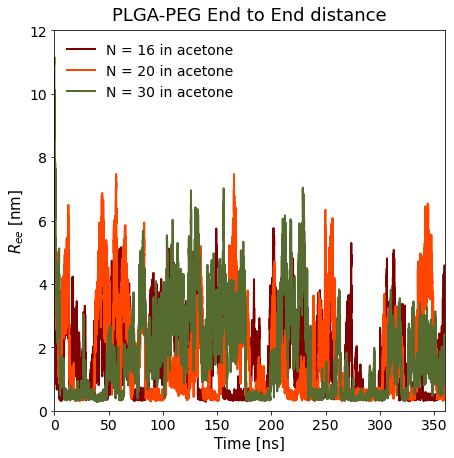

In [6]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
#plt.plot(trj_len/100, e2edis_n6plgapeg_ace[1]/10,linewidth=2, color='teal')
#plt.plot(trj_len/100, e2edis_n8plgapeg_ace[1]/10,linewidth=2, color='dodgerblue')
#plt.plot(trj_len/100, e2edis_n10plgapeg_ace[1]/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, e2edis_n16plgapeg_ace[1]/10,linewidth=2, color='maroon')
plt.plot(trj_len/100, e2edis_n20plgapeg_ace[1]/10,linewidth=2, color='orangered')
plt.plot(trj_len/100, e2edis_n30plgapeg_ace[1]/10,linewidth=2, color='darkolivegreen')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone'],frameon=False, fontsize=14, loc='upper left')
plt.legend(['N = 16 in acetone','N = 20 in acetone','N = 30 in acetone'],frameon=False, fontsize=14, loc='upper left')
#plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone',
#            'N = 16 in acetone','N = 20 in acetone','N = 30 in acetone'],
#           frameon=False, fontsize=14, loc='upper left')
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0,12)

In [ ]:
np.save('n6plgapeg_aceLEE.npy', e2edis_n6plgapeg_ace)
np.save('n8plgapeg_aceLEE.npy', e2edis_n8plgapeg_ace)
np.save('n10plgapeg_aceLEE.npy', e2edis_n10plgapeg_ace)
np.save('n16plgapeg_aceLEE.npy', e2edis_n16plgapeg_ace)
np.save('n20plgapeg_aceLEE.npy', e2edis_n20plgapeg_ace)
np.save('n30plgapeg_aceLEE.npy', e2edis_n30plgapeg_ace)

In [5]:
e2edis_n6plgapeg_ace = np.load('npdata_plgapeg_ace/n6plgapeg_aceLEE.npy', allow_pickle=True)
e2edis_n8plgapeg_ace = np.load('npdata_plgapeg_ace/n8plgapeg_aceLEE.npy', allow_pickle=True)
e2edis_n10plgapeg_ace = np.load('npdata_plgapeg_ace/n10plgapeg_aceLEE.npy', allow_pickle=True)
e2edis_n16plgapeg_ace = np.load('npdata_plgapeg_ace/n16plgapeg_aceLEE.npy', allow_pickle=True)
e2edis_n20plgapeg_ace = np.load('npdata_plgapeg_ace/n20plgapeg_aceLEE.npy', allow_pickle=True)
e2edis_n30plgapeg_ace = np.load('npdata_plgapeg_ace/n30plgapeg_aceLEE.npy', allow_pickle=True)

#### Ree Autocorrelation function

In [ ]:
e2edis_n30plgapeg_ace[1]

In [ ]:
t_corr = 3000
window_shift = 5

In [30]:
ACn30plgapegace_Ree, eqvar_n30plgapegace = obs_autocorr_RA(e2edis_n30plgapeg_ace[1],t_corr, window_shift,start,end)

No. of Samples: 3223


In [31]:
ACn30plgapegace_Ree

array([[ 1.00000000e+00,  9.99672023e-01,  9.96323897e-01, ...,
        -8.69066455e-02, -8.63242155e-02, -8.29600348e-02],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [32]:
eqvar_n30plgapegace

235.1621720945546

In [ ]:
ACn30plgapegace_sqRee, evsqRee_n30plgapegace = obs_autocorr_RA(e2edis_n30plgapeg_ace[0],t_corr, window_shift,start,end)

In [ ]:
np.sqrt(evsqRee_n30plgapegace)

NameError: name 'ACn6plgapegace_Ree' is not defined

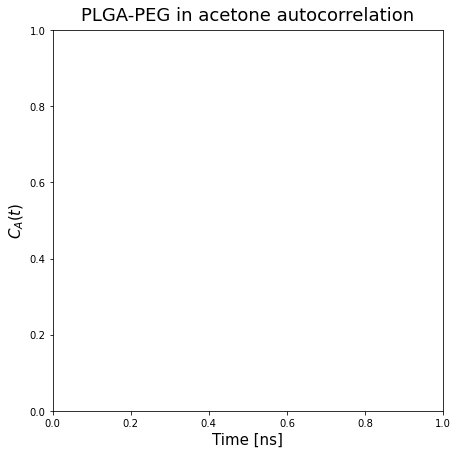

In [33]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Ree[1]/100, ACn6plgapegace_Ree[0],linewidth=2, color='teal')
plt.plot(ACn8plgapegace_Ree[1]/100, ACn8plgapegace_Ree[0],linewidth=2, color='dodgerblue')
plt.plot(ACn10plgapegace_Ree[1]/100, ACn10plgapegace_Ree[0],linewidth=2, color='darkmagenta')
plt.plot(ACn16plgapegace_Ree[1]/100, ACn16plgapegace_Ree[0],linewidth=2, color='maroon')
plt.plot(ACn20plgapegace_Ree[1]/100, ACn20plgapegace_Ree[0],linewidth=2, color='orangered')
plt.plot(ACn30plgapegace_Ree[1]/100, ACn30plgapegace_Ree[0],linewidth=2, color='darkolivegreen')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Ree','N = 8 Ree','N = 10 Ree','N = 16 Ree','N = 20 Ree','N = 30 Ree'], frameon=False, fontsize=14)
#plt.legend(['N = 6 Lee','N = 8 Lee','N = 10 Lee','N = 15 Lee'], frameon=False, fontsize=14)
#plt.legend(['N = 20 Lee','N = 30 Lee'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1)

### Hydrodynamic Radius vs time

In [ ]:
plgapegn30ace_rh = hydro_rad_poly(plgapeg_n30ace, n30_plgapeg_ace, n30_mon, start, end)

In [ ]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
#plt.plot(trj_len/100, plgapegn6ace_rh/10,linewidth=2, color='teal')
#plt.plot(trj_len/100, plgapegn8ace_rh/10,linewidth=2, color='dodgerblue')
#plt.plot(trj_len/100, plgapegn10ace_rh/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, plgapegn16ace_rh/10,linewidth=2, color='maroon')
plt.plot(trj_len/100, plgapegn20ace_rh/10,linewidth=2, color='orangered')
plt.plot(trj_len/100, plgapegn30ace_rh/10,linewidth=2, color='darkolivegreen')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone'],frameon=False, fontsize=14, loc='upper left')
plt.legend(['N = 16 in acetone','N = 20 in acetone','N = 30 in acetone'],frameon=False, fontsize=14, loc='upper left')
#plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone','N = 20 in acetone','N = 30 in acetone'],
#           frameon=False, fontsize=14, loc='upper left')
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(1,6)

In [ ]:
np.save('n6plgapeg_aceRHYD.npy', plgapegn6ace_rh)
np.save('n8plgapeg_aceRHYD.npy', plgapegn8ace_rh)
np.save('n10plgapeg_aceRHYD.npy', plgapegn10ace_rh)
np.save('n16plgapeg_aceRHYD.npy', plgapegn16ace_rh)
np.save('n20plgapeg_aceRHYD.npy', plgapegn20ace_rh)
np.save('n30plgapeg_aceRHYD.npy', plgapegn30ace_rh)

In [7]:
plgapegn6ace_rh = np.load('npdata_plgapeg_ace/n6plgapeg_aceRHYD.npy', allow_pickle=True)
plgapegn8ace_rh = np.load('npdata_plgapeg_ace/n8plgapeg_aceRHYD.npy', allow_pickle=True)
plgapegn10ace_rh = np.load('npdata_plgapeg_ace/n10plgapeg_aceRHYD.npy', allow_pickle=True)
plgapegn16ace_rh = np.load('npdata_plgapeg_ace/n16plgapeg_aceRHYD.npy', allow_pickle=True)
plgapegn20ace_rh = np.load('npdata_plgapeg_ace/n20plgapeg_aceRHYD.npy', allow_pickle=True)
plgapegn30ace_rh = np.load('npdata_plgapeg_ace/n30plgapeg_aceRHYD.npy', allow_pickle=True)

#### Rh autocorrelation

In [34]:
ACn30plgapegaceRh, eqvarRh_n30plgapegace = obs_autocorr_RA(plgapegn30ace_rh,t_corr, window_shift,start,end)

No. of Samples: 3223


In [35]:
ACn30plgapegaceRh

array([[ 1.00000000e+00,  1.01779760e+00,  9.96250018e-01, ...,
        -2.82072319e-01, -2.97415464e-01, -2.89057564e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [36]:
eqvarRh_n30plgapegace

9.072266903152922

In [48]:
ACn30plgapegaceRh[1].shape

(7000,)

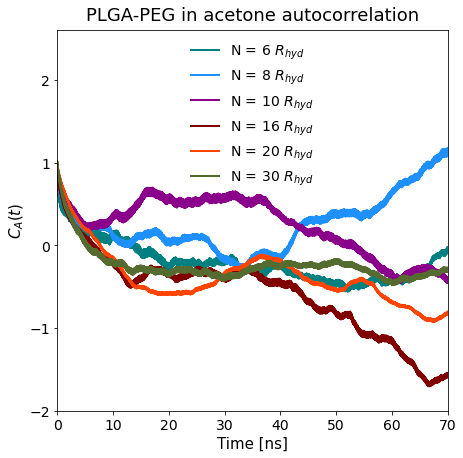

In [51]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegaceRh[1]/100, ACn6plgapegaceRh[0],linewidth=2, color='teal')
plt.plot(ACn8plgapegaceRh[1]/100, ACn8plgapegaceRh[0],linewidth=2, color='dodgerblue')
plt.plot(ACn10plgapegaceRh[1]/100, ACn10plgapegaceRh[0],linewidth=2, color='darkmagenta')
plt.plot(ACn16plgapegaceRh[1]/100, ACn16plgapegaceRh[0],linewidth=2, color='maroon')
plt.plot(ACn20plgapegaceRh[1]/100, ACn20plgapegaceRh[0],linewidth=2, color='orangered')
plt.plot(ACn30plgapegaceRh[1]/100, ACn30plgapegaceRh[0],linewidth=2, color='darkolivegreen')
plt.tick_params(labelsize=14)
plt.legend([r'N = 6 $R_{hyd}$','N = 8 $R_{hyd}$','N = 10 $R_{hyd}$','N = 16 $R_{hyd}$','N = 20 $R_{hyd}$','N = 30 $R_{hyd}$']
 ,frameon=False, fontsize=14)
#plt.legend([r'N = 6 $R_{hyd}$','N = 8 $R_{hyd}$','N = 10 $R_{hyd}$','N = 15 $R_{hyd}$'], frameon=False, fontsize=14)
#plt.legend([r'N = 20 $R_{hyd}$',r'N = 30 $R_{hyd}$'], frameon=False, fontsize=14)
plt.xlim(0,70)
plt.ylim(-2,2.6)
plt.savefig('test.jpg',bbox_inches='tight', dpi=400)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n30_mon = 30 
start = 0
end = 36001
t_corr = 2000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_plgapegn30ace, tcSUM_plgapegn30ace = pos_bead_autocorr_RA(plgapeg_n30ace, n30_plgapeg_ace, n30_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_plgapegn30ace

In [ ]:
tcSUM_plgapegn30ace.shape

### Fitting autocorrelation data 

In [ ]:
xdata_plgapegn30ace = tcRA_plgapegn30ace[1]/100
ydata_plgapegn30ace = tcRA_plgapegn30ace[0]

In [ ]:
ydata_plgapegn30ace.shape

In [ ]:
xdata_plgapegn30ace.shape

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, ydata_plgapegn16ace, color='maroon', s=s_n16)
plt.scatter(xdata_plgapegn20ace, ydata_plgapegn20ace, color='orangered', s=s_n20)
plt.scatter(xdata_plgapegn30ace, ydata_plgapegn30ace, color='darkolivegreen', s=s_n30)
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
np.save('n6plgapeg_aceCt_RA.npy', tcRA_plgapegn6ace)
np.save('n8plgapeg_aceCt_RA.npy', tcRA_plgapegn8ace)
np.save('n10plgapeg_aceCt_RA.npy', tcRA_plgapegn10ace)
np.save('n10plgapeg_aceCt_RA.npy', tcRA_plgapegn16ace)
np.save('n20plgapeg_aceCt_RA.npy', tcRA_plgapegn20ace)
np.save('n30plgapeg_aceCt_RA.npy', tcRA_plgapegn30ace)

In [ ]:
ts = 1
hs = 0.1
n30_mon = 30
n_b = n30_mon - 1
tr1 = 2
zimm_relax_fit(ts,tr1,hs,n_b)

In [ ]:
#zimm_relax_func(ts,tr1,hs,n_b)

In [ ]:
def res_plgapegn30ace(variabls, xnp, ynp):
    #hs_np = variabls['h_star']
    hs_np = 0.26
    tr1_np = variabls['t_first']
    n_bonds = 29
    testnp = []
    for i in range(len(xnp)):
        model_ynp = zimm_relax_fit(xnp[i], tr1_np, hs_np, n_bonds)
        #model_ynp = rouse_relax(xnp[i], tr1_np, n_m)
        testnp.append(ynp[i] - model_ynp)
    
    tt_n6 = np.array(testnp)

    return tt_n6
    
#x1 = np.array([0,0])
#pfit, pcov, infodict, errmsg, success = leastsq(res_poly, x1, args=(xdata, ydata), full_output=1)

In [ ]:
ppfit_n30ace = Parameters()
#ppfit_n30ace.add(name='h_star', value=0, min=0, max=0.26, vary=True)
ppfit_n30ace.add(name='t_first', value=2)

In [ ]:
mini_ppn30ace = Minimizer(res_plgapegn30ace, ppfit_n30ace, fcn_args=(xdata_plgapegn30ace, ydata_plgapegn30ace))
out_ppn30ace = mini_ppn30ace.leastsq()
#bfit_n10 = ydata_n10ace + out_n10ace.residual 

In [ ]:
report_fit(out_ppn30ace.params)

In [ ]:
out_ppn30ace.params

In [ ]:
# with h varying, tr = 2.74572400 +/- 0.02094383, h* = 0.25999272 +/- 0.03122420
tace_n30plgapeg = []
n_bonds = 29
for i in range(len(xdata_plgapegn30ace)):
    tace_n30plgapeg.append(zimm_relax_fit(xdata_plgapegn30ace[i], 2.74882713, 0.26,  n_bonds))


In [ ]:
t_c, tz_n30plgapeg, zimm_n30plgapeg, rouse_n30plgapeg = zimm_relax_func(1, 2.74882713, 0.26,  n_bonds)

In [ ]:
x_pos_n16 = np.arange(15)
x_pos_n20 = np.arange(19)
x_pos_n30 = np.arange(29)
#x_pos_n30 = np.arange(29)
width = 0.25
aa_types_n30 = [r"$\tau_{1}$", r"$\tau_{2}$", r"$\tau_{3}$", r"$\tau_{4}$", r"$\tau_{5}$",r"$\tau_{6}$",r"$\tau_{7}$",
           r"$\tau_{8}$", r"$\tau_{9}$",r"$\tau_{10}$", r"$\tau_{11}$", r"$\tau_{12}$", r"$\tau_{13}$", r"$\tau_{14}$",
            r"$\tau_{15}$",r"$\tau_{16}$",r"$\tau_{17}$", r"$\tau_{18}$", r"$\tau_{19}$",r"$\tau_{20}$", r"$\tau_{21}$", r"$\tau_{12}$", r"$\tau_{13}$", r"$\tau_{14}$",
            r"$\tau_{25}$",r"$\tau_{26}$",r"$\tau_{27}$", r"$\tau_{28}$", r"$\tau_{29}$"]
fig = plt.figure(figsize=(10,10))
plt.title('PLGA-PEG in acetone', fontsize=18)
plt.bar(x_pos_n16+(2*width), tz_n16plgapeg, width, ecolor='black',capsize=5, color='maroon', label='N = 16', align='center')
plt.bar(x_pos_n20+(width), tz_n20plgapeg, width, ecolor='black',capsize=5, color='orangered', label='N = 20', align='center')
plt.bar(x_pos_n30, tz_n30plgapeg, width, ecolor='black',capsize=5, color='darkolivegreen', label='N = 30', align='center')
plt.xticks(x_pos_n30, labels=aa_types_n30, fontsize=12)
plt.legend(fontsize=12 ,frameon=False)
plt.autoscale(enable=True, axis='both')
plt.ylabel(r'Relaxation times [ns]', fontsize=15)

In [ ]:
x_pos = np.arange(29)
aa_eigen_n30 = [r"$a_{1}$", r"$a_{2}$", r"$a_{3}$", r"$a_{4}$", r"$a_{5}$",r"$a_{6}$",r"$a_{7}$",r"$a_{8}$",
           r"$a_{9}$",r"$a_{10}$", r"$a_{11}$", r"$a_{12}$", r"$a_{13}$", r"$a_{14}$",r"$a_{15}$",r"$a_{16}$",r"$a_{17}$",
           r"$a_{18}$",r"$a_{19}$",r"$a_{20}$", r"$a_{21}$", r"$a_{22}$", r"$a_{23}$", r"$a_{24}$",r"$a_{25}$",r"$a_{26}$",
            r"$a_{27}$",r"$a_{28}$",r"$a_{29}$"]
fig = plt.figure(figsize=(10,10))
plt.title('PLGA-PEG in acetone N = 30', fontsize=18)
plt.bar(x_pos_n30, rouse_n30plgapeg, width,ecolor='black',capsize=5, color='c', label='Rouse')
plt.bar(x_pos_n30+width, zimm_n30plgapeg, width,ecolor='black',capsize=5, color='m', label='Zimm')
plt.xticks(x_pos_n30+width,labels=aa_eigen_n30, fontsize=12)
plt.autoscale(enable=True, axis='both')
plt.legend(fontsize=12 ,frameon=False)
plt.ylabel(r'Rouse and Zimm eigenvalues', fontsize=15)

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, ydata_plgapegn6ace, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, ydata_plgapegn8ace, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, ydata_plgapegn10ace, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, ydata_plgapegn16ace, color='maroon', s=s_n16)
plt.scatter(xdata_plgapegn20ace, ydata_plgapegn20ace, color='orangered', s=s_n20)
plt.scatter(xdata_plgapegn30ace, ydata_plgapegn30ace, color='darkolivegreen', s=s_n30)
plt.plot(xdata_plgapegn6ace, tace_n6plgapeg, color='teal')
plt.plot(xdata_plgapegn8ace, tace_n8plgapeg, color='dodgerblue')
plt.plot(xdata_plgapegn10ace, tace_n10plgapeg, color='darkmagenta')
plt.plot(xdata_plgapegn16ace, tace_n16plgapeg, color='maroon')
plt.plot(xdata_plgapegn20ace, tace_n20plgapeg, color='orangered')
plt.plot(xdata_plgapegn30ace, tace_n30plgapeg, color='darkolivegreen')
plt.title(r'Positional bead autocorrelation PLGA-PEG in acetone', fontsize=18,y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,300)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rppace_msen30 = np.array([ydata_plgapegn30ace - np.array(tace_n30plgapeg)])
#rpace_msen6

In [ ]:
plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Arial"
plt.scatter(xdata_plgapegn6ace, rppace_msen6, color='teal', s=s_n6)
plt.scatter(xdata_plgapegn8ace, rppace_msen8, color='dodgerblue', s=s_n8)
plt.scatter(xdata_plgapegn10ace, rppace_msen10, color='darkmagenta', s=s_n10)
plt.scatter(xdata_plgapegn16ace, rppace_msen16, color='maroon', s=s_n16)
plt.scatter(xdata_plgapegn20ace, rppace_msen20, color='orangered', s=s_n20)
plt.scatter(xdata_plgapegn30ace, rppace_msen30, color='darkolivegreen', s=s_n30)
plt.title(r'Relaxation time Fitting Residuals PLGA-PEG in acetone', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,250])
plt.ylim([-0.7,1])
plt.tick_params(labelsize=15)

#### Relaxation Times Alpha Exponent

In [ ]:
out_ppn6ace.params

In [ ]:
out_ppn8ace.params

In [ ]:
out_ppn10ace.params

In [ ]:
out_ppn16ace.params

In [ ]:
out_ppn20ace.params

In [ ]:
out_ppn30ace.params

In [ ]:
zimm_t1_plgapegace = np.zeros(shape=(5,6))
#zimm_t1_plgapegace = np.zeros(shape=(5,5))
zimm_t1_plgapegace[3] = np.array([6,8,10,16,20,30])
#zimm_t1_plgapegace[3] = np.array([6,8,10,16,20])
zimm_t1_plgapegace[0] = np.array([0.36841223, 0.64345497, 0.90674134, 1.66921473, 3.00483233, 2.74882713])
#zimm_t1_plgapegace[0] = np.array([0.36841223, 0.64345497, 0.90674134, 1.66921473, 3.00483233])
zimm_t1_plgapegace[1] = np.array([0.00189147, 0.00321603, 0.00456818, 0.00852786, 0.01536807, 0.01536807])
#zimm_t1_plgapegace[1] = np.array([0.00189147, 0.00321603, 0.00456818, 0.00852786, 0.01536807])
zimm_t1_plgapegace

In [ ]:
np.log10(zimm_t1_plgapegace[0])

In [ ]:
np.log10(zimm_t1_plgapegace[3])

In [ ]:
zimm_t1_plgapegace[1]

In [ ]:
#Error Propagation: https://terpconnect.umd.edu/~toh/models/ErrorPropagation.pdf
t1plgapegace_logerr = np.zeros(shape=(6))
for i in range(6):
    t1plgapegace_logerr[i] = 0.434*((zimm_t1_plgapegace[1][i])/(zimm_t1_plgapegace[0][i]))
    
t1plgapegace_logerr

In [ ]:
zimm_t1_plgapegace[2] = t1plgapegace_logerr

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(zimm_t1_plgapegace[3]), np.log10(zimm_t1_plgapegace[0]), yerr=zimm_t1_plgapegace[2], color='#0371EC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
#plt.plot(np.log10(n_plgapeg), gg_ace, color='#A58262')

In [ ]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_alplgapegace = LinearRegression(fit_intercept=True)
model_alplgapegace.fit(np.log10(zimm_t1_plgapegace[3]).reshape(-1,1), np.log10(zimm_t1_plgapegace[0]))
# Slope here is in nanometers
print("Model slope:    ", model_alplgapegace.coef_[0])
print("Model intercept:", model_alplgapegace.intercept_)

In [ ]:
# https://towardsdatascience.com/how-to-perform-linear-regression-with-confidence-5ed8fc0bb9fe
pair_regression(np.log10(zimm_t1_plgapegace[3]),np.log10(zimm_t1_plgapegace[0]))

In [ ]:
ggal_plgapegace = model_alplgapegace.predict(np.log10(zimm_t1_plgapegace[3]).reshape(-1,1))
ggal_plgapegace

In [ ]:
np.log10(zimm_t1_plgapegace[0])

In [ ]:
# Residuals between the true y data and model y data 
resid_alpace = np.log10(zimm_t1_plgapegace[0]) - ggal_plgapegace
resid_alpace

In [ ]:
# How to calculate mean squared error, N - 2 is dof 
mse_alpace = np.sum(resid_alpace**2)/(len(resid_alpace) - 2)
mse_alpace

In [ ]:
# Normalized root mean squared error
np.sqrt(mse_alpace)/(np.max(np.log10(zimm_t1_plgapegace[0])) - np.min(np.log10(zimm_t1_plgapegace[0])))

In [ ]:
print("R2 score:", sklearn.metrics.r2_score(np.log10(zimm_t1_plgapegace[0]), ggal_plgapegace))

In [ ]:
# https://towardsdatascience.com/how-to-perform-linear-regression-with-confidence-5ed8fc0bb9fe
getPairStats(np.log10(zimm_t1_plgapegace[3]),np.log10(zimm_t1_plgapegace[0]))

In [ ]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttplgapegace = np.log10(zimm_t1_plgapegace[3]) - np.mean(np.log10(zimm_t1_plgapegace[3]))
nhui_plgapegace = nt_ttplgapegace**2
np.sum(nhui_plgapegace)

In [ ]:
# How to calculate Sxy
ata_tr = np.sum((np.log10(zimm_t1_plgapegace[0]) - np.mean(np.log10(zimm_t1_plgapegace[0])))*(nt_ttplgapegace))
ata_tr

In [ ]:
# Test statistic, t0
slp_esttr = ata_tr/np.sum(nhui_plgapegace)
slp_esttr/np.sqrt(mse_alpace/(np.sum(nhui_plgapegace)))

In [ ]:
# t-value with 95 % confidence intervals (alpha/2, n-2)
# Value of test statistic is greater than threshold, reject H0
n = len(resid_alpace) 
alpha = 0.05
scipy.stats.t.ppf(1-alpha/2, n - 2)

In [ ]:
# How to calculate 95% confidence interval for the slope 
flc_trpace = scipy.stats.t.ppf(1-alpha/2, n - 2)*np.sqrt(mse_alpace/np.sum(nhui_plgapegace))
flc_trpace

In [ ]:
# standard error of the slope
np.sqrt(mse_alpace/np.sum(nhui_plgapegace))

In [ ]:
# https://towardsdatascience.com/how-to-perform-linear-regression-with-confidence-5ed8fc0bb9fe
simple_regression_conf(np.log10(zimm_t1_plgapegace[3]),np.log10(zimm_t1_plgapegace[0]), alpha=0.05)

In [ ]:
zimm_t1_plgapegace[4] = ggal_plgapegace
zimm_t1_plgapegace

In [ ]:
np.save('PLGAPEGacetone6pts_relax_times.npy', zimm_t1_plgapegace)

In [ ]:
np.save('PLGAPEGacetone_5pts_relax_times.npy', zimm_t1_plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(zimm_t1_plgapegace[3]), np.log10(zimm_t1_plgapegace[0]), yerr=zimm_t1_plgapegace[2], color='#0371EC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(zimm_t1_plgapegace[3]), zimm_t1_plgapegace[4], color='#0371EC')
plt.title(r'Relaxation Times Scaling Exponent, PLGA-PEG in Acetone', fontsize=15)
plt.xlabel(r'Log($N_{PLGA-PEG}$)', fontsize=15)
plt.ylabel(r'Log($\tau_{1}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(0.9, 0.4, r'$\alpha_{Acetone}$ = 1.34 ± 0.36', fontsize=15, color='#0371EC')
plt.text(0.9, 0.35, r'$R^{2}$ = 0.934, NRMSE = 0.114', fontsize=15, color='#0371EC')


#### Radius of Gyration vs. time N = 30 PLGA-PEG in acetone

In [ ]:
# Key variables 
n30_mon = 30
start = 0
end =36001

In [ ]:
n30plgapeg_rgens_ace, cor_n30plgapeg_ace, n30plgapeg_cos_ace, rgace_n30plgapeg = get_rg_pers_poly(plgapeg_n30ace, n30_plgapeg_ace,
                                                                                                  start,end)

In [ ]:
n30plgapeg_rgens_ace.shape

In [ ]:
rgace_n30plgapeg

In [ ]:
n30plgapeg_rgens_ace.shape

(0.2, 4.0)

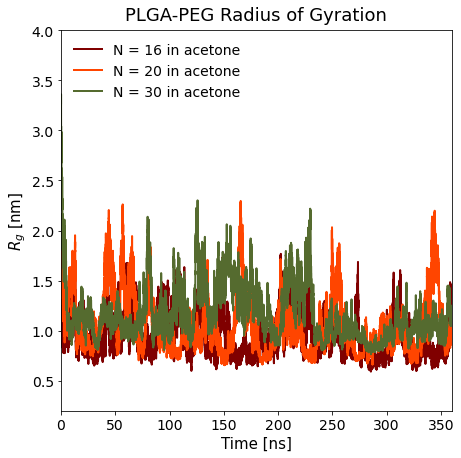

In [53]:
trj_len = np.arange(36001)
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
#plt.plot(trj_len/100, n6plgapeg_rgens_ace[0]/10,linewidth=2, color='teal')
#plt.plot(trj_len/100, n8plgapeg_rgens_ace[0]/10,linewidth=2, color='dodgerblue')
#plt.plot(trj_len/100, n10plgapeg_rgens_ace[0]/10,linewidth=2, color='darkmagenta')
plt.plot(trj_len/100, n16plgapeg_rgens_ace[0]/10,linewidth=2, color='maroon')
plt.plot(trj_len/100, n20plgapeg_rgens_ace[0]/10,linewidth=2, color='orangered')
plt.plot(trj_len/100, n30plgapeg_rgens_ace[0]/10,linewidth=2, color='darkolivegreen')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone'],frameon=False, fontsize=14, loc='upper left')
plt.legend(['N = 16 in acetone','N = 20 in acetone','N = 30 in acetone'],frameon=False, fontsize=14, loc='upper left')
#plt.legend(['N = 6 in acetone', 'N = 8 in acetone','N = 10 in acetone','N = 16 in acetone','N = 20 in acetone','N = 30 in acetone'],
#           frameon=False, fontsize=14, loc='upper left')
#plt.text(127, 0.96,r'N = 6 in acetone', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,360)
plt.ylim(0.2,4)

In [ ]:
np.save('n6plgapeg_aceRg.npy', n6plgapeg_rgens_ace)
np.save('n8plgapeg_aceRg.npy', n8plgapeg_rgens_ace)
np.save('n10plgapeg_aceRg.npy', n10plgapeg_rgens_ace)
np.save('n16plgapeg_aceRg.npy', n16plgapeg_rgens_ace)
np.save('n20plgapeg_aceRg.npy', n20plgapeg_rgens_ace)
np.save('n30plgapeg_aceRg.npy', n30plgapeg_rgens_ace)

In [52]:
n6plgapeg_rgens_ace = np.load('npdata_plgapeg_ace/n6plgapeg_aceRg.npy', allow_pickle=True)
n8plgapeg_rgens_ace = np.load('npdata_plgapeg_ace/n8plgapeg_aceRg.npy', allow_pickle=True)
n10plgapeg_rgens_ace = np.load('npdata_plgapeg_ace/n10plgapeg_aceRg.npy', allow_pickle=True)
n16plgapeg_rgens_ace = np.load('npdata_plgapeg_ace/n16plgapeg_aceRg.npy', allow_pickle=True)
n20plgapeg_rgens_ace = np.load('npdata_plgapeg_ace/n20plgapeg_aceRg.npy', allow_pickle=True)
n30plgapeg_rgens_ace = np.load('npdata_plgapeg_ace/n30plgapeg_aceRg.npy', allow_pickle=True)

In [ ]:
n30plgapeg_rgens_ace = np.load('n30plgapeg_aceRg.npy', allow_pickle=True)
plgapegn30ace_rh = np.load('n30plgapeg_aceRHYD.npy', allow_pickle=True)

In [ ]:
rg_rh_n30plgapegace = n30plgapeg_rgens_ace[0]/plgapegn30ace_rh

In [ ]:
trj_len = np.arange(rg_rh_n30plgapegace.shape[0])
trj_len.shape

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(trj_len/100, rg_rh_n30plgapegace)
plt.xlim(0,360)

In [ ]:
rhy_rg_plgapegace = np.load('PLGAPEGacetone_RgRh_Lc.npy', allow_pickle=True)
rhy_rg_plgapegace[0]

In [ ]:
rhy_rg_plgapegace[0][5]

In [ ]:
rg_rh_n30plgapegace[1334]

In [ ]:
np.where(rg_rh_n30plgapegace < rhy_rg_plgapegace[0][5])

#### Rg Autocorrelation

In [54]:
ACn30plgapegace_Rg, eqvarRg_n30plgapegace = obs_autocorr_RA(n30plgapeg_rgens_ace[0],t_corr, window_shift,start,end)

No. of Samples: 3223


In [55]:
ACn30plgapegace_Rg

array([[ 1.00000000e+00,  1.00147398e+00,  9.97898943e-01, ...,
        -4.31164674e-01, -4.34798539e-01, -4.24697118e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         6.99700000e+03,  6.99800000e+03,  6.99900000e+03]])

In [56]:
eqvarRg_n30plgapegace

8.189685227815062

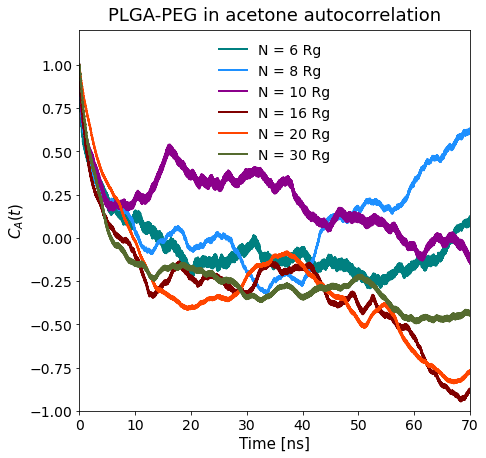

In [75]:
plt.figure(figsize=(7,7))
plt.title(r'PLGA-PEG in acetone autocorrelation', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$C_{A}(t)$', fontsize=15)
plt.plot(ACn6plgapegace_Rg[1]/100, ACn6plgapegace_Rg[0],linewidth=2, color='teal')
plt.plot(ACn8plgapegace_Rg[1]/100, ACn8plgapegace_Rg[0],linewidth=2, color='dodgerblue')
plt.plot(ACn10plgapegace_Rg[1]/100, ACn10plgapegace_Rg[0],linewidth=2, color='darkmagenta')
plt.plot(ACn16plgapegace_Rg[1]/100, ACn16plgapegace_Rg[0],linewidth=2, color='maroon')
plt.plot(ACn20plgapegace_Rg[1]/100, ACn20plgapegace_Rg[0],linewidth=2, color='orangered')
plt.plot(ACn30plgapegace_Rg[1]/100, ACn30plgapegace_Rg[0],linewidth=2, color='darkolivegreen')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 Rg','N = 8 Rg','N = 10 Rg','N = 16 Rg','N = 20 Rg','N = 30 Rg'], frameon=False, fontsize=14)
#plt.legend(['N = 6 Rg','N = 8 Rg','N = 10 Rg','N = 15 Rg'], frameon=False, fontsize=14)
#plt.legend(['N = 20 Rg','N = 30 Rg'], frameon=False, fontsize=14)
#plt.yscale('symlog', linthreshy=0.5)
#plt.xscale('symlog')
plt.xlim(0,70)
plt.ylim(-1,1.2)
plt.savefig('CA_rgpp_ace.jpg',bbox_inches='tight', dpi=400)

#### Get average COM distance, arch length values

In [ ]:
cb_n30plga = np.zeros(shape=(36001))
cb_n30pplinker = np.zeros(shape=(36001))
cb_n30plgapeg = np.zeros(shape=(36001))
count = 0
for ts in n30_plgapeg_ace.trajectory[0:36001]:
    # 1st two PLGA residues
    n30m1_plga = n30_plgapeg_ace.select_atoms("resid 1")
    n30m2_plga = n30_plgapeg_ace.select_atoms("resid 2")
    # PLGA-PEG linker (n_mon/2 to get to bPLG res no.)
    n30pl_link = n30_plgapeg_ace.select_atoms("resid 15")
    n30plgapeg_link = n30_plgapeg_ace.select_atoms("resid 16")
    # last two PEG residues 
    n30l1_peg = n30_plgapeg_ace.select_atoms("resid 29")
    n30l2_peg = n30_plgapeg_ace.select_atoms("resid 30")
    
    cb_n30plga[count] = mda.analysis.distances.distance_array(n30m1_plga.center_of_mass(), n30m2_plga.center_of_mass(), 
                                                   box=n30_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n30pplinker[count] = mda.analysis.distances.distance_array(n30pl_link.center_of_mass(), n30plgapeg_link.center_of_mass(), 
                                                   box=n30_plgapeg_ace.trajectory.ts.dimensions)
    
    cb_n30plgapeg[count] = mda.analysis.distances.distance_array(n30l1_peg.center_of_mass(), n30l2_peg.center_of_mass(), 
                                                   box=n30_plgapeg_ace.trajectory.ts.dimensions)
    
    count += 1
    

    

In [ ]:
COM_ppn30ace = np.zeros(shape=(3,2))
COM_ppn30ace[0,0] = np.mean(cb_n30plga)
COM_ppn30ace[1,0] = np.mean(cb_n30pplinker)
COM_ppn30ace[2,0] = np.mean(cb_n30plgapeg)
COM_ppn30ace[0,1] = np.std(cb_n30plga)
COM_ppn30ace[1,1] = np.std(cb_n30pplinker)
COM_ppn30ace[2,1] = np.std(cb_n30plgapeg)
COM_ppn30ace

#### Correlation values at each arc length for the whole 360 ns trajectory, N = 30 PLGA-PEG/acetone

In [ ]:
# x values
blen_ppn30ace = np.zeros(shape=29)
for i in range(n30_mon-1):
    if i < int((n30_mon/2)-1):
        # PLGA contour length values
        if i == 0:
            blen_ppn30ace[i] = 0
        elif i != 0:
            blen_ppn30ace[i] = np.sum(blen_ppn30ace[i-1]) + COM_ppn30ace[0,0]    
    elif i == int((n30_mon/2)-1):
        #PLGA-PEG linker length
        blen_ppn30ace[i] = np.sum(blen_ppn30ace[i-1]) + COM_ppn30ace[1,0]
    elif i > int((n30_mon/2)-1):
    #    # PEG contour length values
        blen_ppn30ace[i] = np.sum(blen_ppn30ace[i-1]) + COM_ppn30ace[2,0]
        
blen_ppn30ace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn30ace, cor_n30plgapeg_ace[0], yerr=cor_n30plgapeg_ace[1], color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
# Error prop. into natural log std deviation
mk_n30ppace = cor_n30plgapeg_ace[1]/cor_n30plgapeg_ace[0]
mk_n30ppace

In [ ]:
cor_n30plgapeg_ace[0]

In [ ]:
cor_n30plgapeg_ace[1].shape

In [ ]:
a = np.arange(29)
p1 = np.ma.masked_where(a == 25, np.log(cor_n30plgapeg_ace[0]))
costh_n30ace = np.ma.masked_where(a == 26, p1)
e1 = np.ma.masked_where(a == 25, mk_n30ppace)
errln_n30ace  = np.ma.masked_where(a == 26, e1)

In [ ]:
mk_n30ppace[25] = 0
mk_n30ppace[26] = 0
mk_n30ppace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn30ace, costh_n30ace, yerr=errln_n30ace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn30ace, np.log(cor_n30plgapeg_ace[0]), yerr=mk_n30ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [ ]:
# All the points give the best fits for N = 6 peg in acetone
n30_blksplgapeg_ace , n30plgapeg_lpace = bavg_pers_cnt(5, plgapeg_n30ace, n30_plgapeg_ace, blen_ppn30ace, 5, 0 , 36001)

In [ ]:
n30_blksplgapeg_ace

In [ ]:
n30plgapeg_lpace

In [ ]:
n30plgapeg_lpace[2]

In [ ]:
np.mean(n30plgapeg_lpace[3])

#### line fitted to cosine theta values using mean slope

In [ ]:
blen_ppn30ace

In [ ]:
gg_n30plgapeg_ace = line_fit(np.mean(n30plgapeg_lpace[2]),blen_ppn30ace)

In [ ]:
gg_n20plgapeg_n30ace = line_fit(np.mean(n20plgapeg_lpace[2]),blen_ppn30ace)

In [ ]:
gg_n16plgapeg_n30ace = line_fit(np.mean(n16plgapeg_lpace[2]),blen_ppn30ace)

In [ ]:
gg_n10plgapeg_n30ace = line_fit(np.mean(n10plgapeg_lpace[2]),blen_ppn30ace)

In [ ]:
gg_n8plgapeg_n30ace = line_fit(np.mean(n8plgapeg_lpace[2]),blen_ppn30ace)

In [ ]:
gg_n6plgapeg_n30ace = line_fit(np.mean(n6plgapeg_lpace[2]),blen_ppn30ace)

In [ ]:
gg_n30plgapeg_ace

#### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 30 PLGA-PEG in acetone

In [ ]:
blppn30ace = []
for i in range(n30_mon-1):
    if i < int((n30_mon/2)-1):
        # PLGA contour length values
        blppn30ace.append(COM_ppn30ace[0,0])    
    elif i == int((n30_mon/2)-1):
        #PLGA-PEG linker length
        blppn30ace.append(COM_ppn30ace[1,0]) 
    elif i > int((n30_mon/2)-1):
    #    # PEG contour length values
        blppn30ace.append(COM_ppn30ace[2,0]) 

# Contour Length, N = 6 PLGA-PEG in acetone
lc_ppn30ace = np.sum(blppn30ace)
lc_ppn30ace

#### Mean sq. e2e/Mean sq. Rg vs contour length PLGA-PEG in acetone

In [ ]:
# Ree^2/Rg^2 array at different contour lengths
re2e_rgsq_plgapegace[1,5] = lc_ppn30ace
re2e_rgsq_plgapegace

In [ ]:
a_ppn30ace = np.mean(n30_blksplgapeg_ace['Avg Sq. end to end distance'])

In [ ]:
b_ppn30ace = np.mean(n30_blksplgapeg_ace['Avg Sq. radius of gyration'])

In [ ]:
re2e_rgsq_plgapegace[0,5] = a_ppn30ace/b_ppn30ace
re2e_rgsq_plgapegace

#### Error propagation: Mean sq. e2e/Mean sq. Rg

In [ ]:
e2esq_plgapegace = np.array([a_ppn6ace,a_ppn8ace, a_ppn10ace, a_ppn16ace,a_ppn20ace, a_ppn30ace])
e2esq_plgapegace

In [ ]:
rgsq_plgapegace = np.array([b_ppn6ace,b_ppn8ace, b_ppn10ace, b_ppn16ace, b_ppn20ace, b_ppn30ace])
rgsq_plgapegace

In [ ]:
# Error Propagation: https://terpconnect.umd.edu/~toh/models/ErrorPropagation.pdf
stde2e_pdsys = np.array([np.std(n6_blksplgapeg_ace['Avg Sq. end to end distance']),
                         np.std(n8_blksplgapeg_ace['Avg Sq. end to end distance']),
                        np.std(n10_blksplgapeg_ace['Avg Sq. end to end distance']),
                         np.std(n16_blksplgapeg_ace['Avg Sq. end to end distance']),
                        np.std(n20_blksplgapeg_ace['Avg Sq. end to end distance']),
                        np.std(n30_blksplgapeg_ace['Avg Sq. end to end distance'])])
stde2e_pdsys

In [ ]:
stdrgsq_pdsys = np.array([np.std(n6_blksplgapeg_ace['Avg Sq. radius of gyration']),
                         np.std(n8_blksplgapeg_ace['Avg Sq. radius of gyration']),
                         np.std(n10_blksplgapeg_ace['Avg Sq. radius of gyration']),
                          np.std(n16_blksplgapeg_ace['Avg Sq. radius of gyration']),
                         np.std(n20_blksplgapeg_ace['Avg Sq. radius of gyration']),
                         np.std(n30_blksplgapeg_ace['Avg Sq. radius of gyration'])])
stdrgsq_pdsys

In [ ]:
re2e_rgsq_plgapegace[0]

In [ ]:
x_pdsys = np.zeros(shape=6)
for i in range(6):
    ad_s = np.sqrt((((stde2e_pdsys[i]/e2esq_plgapegace[i])**2) + ((stdrgsq_pdsys[i]/rgsq_plgapegace[i])**2)))
    x_pdsys[i] = re2e_rgsq_plgapegace[0][i]*ad_s
    
x_pdsys

In [ ]:
re2e_rgsq_plgapegace

In [ ]:
re2e_rgsq_plgapegace[2] = x_pdsys
re2e_rgsq_plgapegace

In [ ]:
re2e_rgsq_plgapegace.shape

In [ ]:
np.save('PLGA-PEGace_msRee_msRg.npy', re2e_rgsq_plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(re2e_rgsq_plgapegace[1]/10, re2e_rgsq_plgapegace[0], yerr=re2e_rgsq_plgapegace[2], color='#0371EC', linestyle="-",marker='v',
     capsize=5, capthick=1, ecolor='#0371EC')
plt.title('Mean sq. Ree/Mean sq. Rg, PLGA-PEG in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Contour Length, $L_{c}$ [nm]', fontsize=15)
plt.ylabel(r'$\left<R_{ee}^{2}\right>/\left<R_{g}^{2}\right>$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1,15)
plt.ylim(0,10)

#### Rg/Rh vs contour length PLGA-PEG in acetone

In [ ]:
# Rg/Rh array at different contour lengths 
rhy_rg_plgapegace[1,5] = lc_ppn30ace
rhy_rg_plgapegace

In [ ]:
aa_ppn30ace = np.mean(n30_blksplgapeg_ace['Avg Radius of gyration'])

In [ ]:
bb_ppn30ace = np.mean(n30_blksplgapeg_ace['Avg Hydrodynamic radius'])

In [ ]:
rhy_rg_plgapegace[0,5] = aa_ppn30ace/bb_ppn30ace
rhy_rg_plgapegace

In [ ]:
rhy_rg_plgapegace

#### Error Propagation: Rg/Rh vs contour length

In [ ]:
rgsys_plgapegace = np.array([aa_ppn6ace,aa_ppn8ace, aa_ppn10ace, aa_ppn16ace,aa_ppn20ace, aa_ppn30ace])
rgsys_plgapegace

In [ ]:
rhydsys_plgapegace = np.array([bb_ppn6ace,bb_ppn8ace, bb_ppn10ace, bb_ppn16ace, bb_ppn20ace, bb_ppn30ace])
rhydsys_plgapegace

In [ ]:
# Error Propagation: https://terpconnect.umd.edu/~toh/models/ErrorPropagation.pdf
stdrg_pdsys = np.array([np.std(n6_blksplgapeg_ace['Avg Radius of gyration']),
                         np.std(n8_blksplgapeg_ace['Avg Radius of gyration']),
                        np.std(n10_blksplgapeg_ace['Avg Radius of gyration']),
                        np.std(n16_blksplgapeg_ace['Avg Radius of gyration']),
                        np.std(n20_blksplgapeg_ace['Avg Radius of gyration']),
                        np.std(n30_blksplgapeg_ace['Avg Radius of gyration'])])
stdrg_pdsys

In [ ]:
std_rhydsq_pdsys = np.array([np.std(n6_blksplgapeg_ace['Avg Hydrodynamic radius']),
                         np.std(n8_blksplgapeg_ace['Avg Hydrodynamic radius']),
                         np.std(n10_blksplgapeg_ace['Avg Hydrodynamic radius']),
                          np.std(n16_blksplgapeg_ace['Avg Hydrodynamic radius']),    
                         np.std(n20_blksplgapeg_ace['Avg Hydrodynamic radius']),
                         np.std(n30_blksplgapeg_ace['Avg Hydrodynamic radius'])])
std_rhydsq_pdsys

In [ ]:
xrgrh_pdsys = np.zeros(shape=6)
for i in range(6):
    adn1_s = np.sqrt((((stdrg_pdsys[i]/rgsys_plgapegace[i])**2) + ((std_rhydsq_pdsys[i]/rhydsys_plgapegace[i])**2)))
    xrgrh_pdsys[i] = rhy_rg_plgapegace[0][i]*adn1_s
    
xrgrh_pdsys

In [ ]:
rhy_rg_plgapegace

In [ ]:
rhy_rg_plgapegace[2] = xrgrh_pdsys
rhy_rg_plgapegace

In [ ]:
np.save('PLGAPEGacetone_RgRh_Lc.npy', rhy_rg_plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(rhy_rg_plgapegace[1]/10, rhy_rg_plgapegace[0], yerr=rhy_rg_plgapegace[2], color='#0371EC', linestyle="-",
             marker='^', capsize=5, capthick=1, ecolor='#0371EC')
plt.title(r'Rg/Rh PLGA-PEG in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Contour Length, $L_{c}$ [nm]', fontsize=15)
plt.ylabel(r'$\left<R_{g}\right>/\left<R_{hyd}\right>$', fontsize=15)
plt.xlim(1,15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.3,0.7)

### kuhn lenght vs monomer length

In [ ]:
REElclk_plgapegace = np.load('PLGAPEGacetone_REElclk.npy', allow_pickle=True)

In [ ]:
REElclk_plgapegace = np.zeros(shape=(4,6))
REElclk_plgapegace[0] = e2esq_plgapegace
REElclk_plgapegace[1] = rhy_rg_plgapegace[1]
REElclk_plgapegace[2] = stde2e_pace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(REElclk_plgapegace[1], REElclk_plgapegace[0], color='#0371EC', yerr=REElclk_plgapegace[2], linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='#0371EC')

In [ ]:
# Linear fitting procedure: https://www2.isye.gatech.edu/~yxie77/isye2028/lecture12.pdf
ne2e = REElclk_plgapegace[1]
from sklearn.linear_model import LinearRegression
model_e2eppace = LinearRegression(fit_intercept=True)
model_e2eppace.fit(ne2e.reshape(-1,1), REElclk_plgapegace[0])
# Slope here is in angstroms
print("Model slope:    ", model_e2eppace.coef_[0])
print("Model intercept:", model_e2eppace.intercept_)

In [ ]:
# https://towardsdatascience.com/how-to-perform-linear-regression-with-confidence-5ed8fc0bb9fe
pair_regression(REElclk_plgapegace[1],REElclk_plgapegace[0])

In [ ]:
gge2e_ppace = model_e2eppace.predict(ne2e.reshape(-1,1))
gge2e_ppace

In [ ]:
REElclk_plgapegace[0]

In [ ]:
# Residuals between the true y data and model y data 
resid_e2eppace = REElclk_plgapegace[0] - gge2e_ppace
resid_e2eppace

In [ ]:
# How to calculate mean squared error, N - 2 is dof 
mse_e2eppace = np.sum(resid_e2eppace**2)/(len(resid_e2eppace) - 2)
mse_e2eppace

In [ ]:
# Normalized root mean squared error
np.sqrt(mse_e2eppace)/(np.max(REElclk_plgapegace[0]) - np.min(REElclk_plgapegace[0]))

In [ ]:
print("R2 score:", sklearn.metrics.r2_score(REElclk_plgapegace[0].reshape(-1,1), gge2e_ppace))

In [ ]:
# https://towardsdatascience.com/how-to-perform-linear-regression-with-confidence-5ed8fc0bb9fe
getPairStats(REElclk_plgapegace[1],REElclk_plgapegace[0])

In [ ]:
# How to calculate Sxx
nt_tte2epd = ne2e - np.mean(ne2e)
nhui_e2epd = nt_tte2epd**2
np.sum(nhui_e2epd)

In [ ]:
# How to calculate Sxy
ata = np.sum((REElclk_plgapegace[0] - np.mean(REElclk_plgapegace[0]))*(ne2e - np.mean(ne2e)))
ata

In [ ]:
# Test statistic, t0
(ata/np.sum(nhui_e2epd))/np.sqrt(mse_e2eppace/(np.sum(nhui_e2epd)))

In [ ]:
# t-value with 95 % confidence intervals (alpha, n-2)
# Value of test statistic is greater than threshold, reject H0
n = len(resid_e2eppace) 
alpha = 0.05
scipy.stats.t.ppf(1-alpha/2, n - 2)
#scipy.stats.t.ppf(0.95, len(resid_e2epgace) - 1)

In [ ]:
# How to calculate 95% confidence interval for the slope 
flc_e2epd = scipy.stats.t.ppf(1-alpha/2, n - 2)*np.sqrt(mse_e2eppace/(np.sum(nhui_e2epd)))
flc_e2epd

In [ ]:
# standard error of the slope
np.sqrt(mse_e2eppace/np.sum(nhui_e2epd))

In [ ]:
# https://towardsdatascience.com/how-to-perform-linear-regression-with-confidence-5ed8fc0bb9fe
simple_regression_conf(REElclk_plgapegace[1],REElclk_plgapegace[0], alpha=0.05)

In [ ]:
REElclk_plgapegace[3] = gge2e_ppace
REElclk_plgapegace

In [ ]:
np.save('PLGAPEGacetone_REElclk.npy', REElclk_plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(REElclk_plgapegace[1], REElclk_plgapegace[0], color='#0371EC', yerr=REElclk_plgapegace[2], linestyle="None",marker='v',
     capsize=5, capthick=1, ecolor='#0371EC')
plt.plot(REElclk_plgapegace[1], REElclk_plgapegace[3], color='#0371EC')
plt.title(r'Kuhn Length, PLGA-PEG in acetone', fontsize=15)
plt.ylabel(r'$\left<R_{ee}^{2}\right>$', fontsize=15)
plt.xlabel(r'Contour Length, $L_{c}$ [$\AA$]', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(30, 1000, r'$l^{acetone}_{k}$ = 3.90 $\AA$ ± 0.65 $\AA$', fontsize=15, color='#0371EC')
plt.text(30, 910, r'$R^{2}$ = 0.898, NRMSE = 0.14', fontsize=15, color='#0371EC')
plt.xlim(10,150)
plt.ylim(0,1200)

#### Lp alternate method

In [ ]:
REElclk_plgapegace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(REElclk_plgapegace[1], REElclk_plgapegace[0], color='#0371EC', yerr=REElclk_plgapegace[2], linestyle="None",marker='v',
     capsize=5, capthick=1, ecolor='#0371EC')
#plt.plot(REElclk_plgapegace[1]/10, REElclk_plgapegace[3], color='#0371EC')
plt.title(r'Kuhn Length, PLGA-PEG in acetone', fontsize=15)
plt.ylabel(r'$\left<R_{ee}^{2}\right>$', fontsize=15)
plt.xlabel(r'Contour Length, $L_{c}$ [A]', fontsize=15)
plt.tick_params(labelsize=14)
plt.xlim(10,150)
plt.ylim(0,1200)

In [ ]:
REElclk_plgapegace[2]

In [ ]:
REElclk_plgapegace[1]

In [ ]:
REElclk_plgapegace[0]

In [ ]:
def sqree_lpfitting(lc, lp):
    
    fir_p = 2*lp*lc
    
    sec_p = 1 - ((lp/lc)*(1 - np.exp(-lc/lp)))
    
    return fir_p*sec_p
    

In [ ]:
sqree_lpfitting(16.2, 3.8)

In [ ]:
def perslen_fitplgapegace(varbs, xlc, yree):
    fir_varb = varbs['lp']
    test_yree = []
    
    for i in range(len(xlc)):
        model_yree = sqree_lpfitting(xlc[i],fir_varb)
        test_yree.append(yree[i]- model_yree)
        
    return np.array(test_yree)

In [ ]:
from lmfit import Minimizer, Parameters, report_fit

In [ ]:
plgapegace_perfit = Parameters()
plgapegace_perfit.add(name='lp', value=0)

In [ ]:
perlc_plgapegace = Minimizer(perslen_fitplgapegace, plgapegace_perfit, fcn_args=(REElclk_plgapegace[1], REElclk_plgapegace[0]))
olplc_plgapegace = perlc_plgapegace.leastsq()
#bfit_n10 = ydata_n10ace + out_n10ace.residual 

In [ ]:
report_fit(olplc_plgapegace.params)

In [ ]:
olplc_plgapegace.params

In [ ]:
plgapegacelcree = []
xlc = REElclk_plgapegace[1]
for i in range(len(REElclk_plgapegace[1])):
    plgapegacelcree.append(sqree_lpfitting(xlc[i], 2.49681926))
    
md_nlppace = np.array(plgapegacelcree)

In [ ]:
md_nlppace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(REElclk_plgapegace[1], REElclk_plgapegace[0], color='#0371EC', yerr=REElclk_plgapegace[2], linestyle="None",marker='v',
    capsize=5, capthick=1, ecolor='#0371EC')
plt.plot(REElclk_plgapegace[1], md_nlppace, color='r', ls='--')
plt.title(r'$L_{p}$ alt calc, PLGA-PEG in acetone', fontsize=15)
plt.ylabel(r'$\left<R_{ee}^{2}\right>$', fontsize=15)
plt.xlabel(r'Contour Length, $L_{c}$ [$\AA$]', fontsize=15)
plt.legend([r'Model: $L_{p}$ = 2.50 $\AA$ ± 0.22 $\AA$','Sim'], frameon=False, fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim(10,150)
plt.ylim(0,1200)

#### Error Propagation: Lp/Lc ratio

In [ ]:
# pers length/contour length 
kuhnlpL_plgapegace[0,5] = np.mean(n30_blksplgapeg_ace["Avg persistence length"])/lc_ppn30ace
kuhnlpL_plgapegace

In [ ]:
kuhnlpL_plgapegace

In [ ]:
lpsys_plgapegace = np.array([np.mean(n6_blksplgapeg_ace["Avg persistence length"]),
                         np.mean(n8_blksplgapeg_ace["Avg persistence length"]),
                        np.mean(n10_blksplgapeg_ace["Avg persistence length"]),
                        np.mean(n16_blksplgapeg_ace["Avg persistence length"]),  
                        np.mean(n20_blksplgapeg_ace["Avg persistence length"]),
                        np.mean(n30_blksplgapeg_ace["Avg persistence length"])])
lpsys_plgapegace

In [ ]:
# Error Propagation: https://terpconnect.umd.edu/~toh/models/ErrorPropagation.pdf
stdlp_pdsys = np.array([np.std(n6_blksplgapeg_ace["Avg persistence length"]),
                         np.std(n8_blksplgapeg_ace["Avg persistence length"]),
                        np.std(n10_blksplgapeg_ace["Avg persistence length"]),
                        np.std(n16_blksplgapeg_ace["Avg persistence length"]),
                        np.std(n20_blksplgapeg_ace["Avg persistence length"]),
                        np.std(n30_blksplgapeg_ace["Avg persistence length"])])
stdlp_pdsys

In [ ]:
xlp_pdsys = np.zeros(shape=6)
for i in range(6):
    adn2_s = np.sqrt((((stdlp_pdsys[i]/lpsys_plgapegace[i])**2)))
    xlp_pdsys[i] = kuhnlpL_plgapegace[0][i]*adn2_s
    
xlp_pdsys

In [ ]:
kuhnlpL_plgapegace[2] = xlp_pdsys
kuhnlpL_plgapegace

In [ ]:
np.save('PLGAPEGacetone_lk_LpL.npy', kuhnlpL_plgapegace)

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel(r'$N_{PEG}$', fontsize=15)
plt.ylabel(r'$\left<L_{p}\right>/L_{c}$', fontsize=15)
plt.title('Level of rigidity, PLGA-PEG in acetone', fontsize=15)
plt.errorbar(kuhnlpL_plgapegace[1], kuhnlpL_plgapegace[0], yerr=kuhnlpL_plgapegace[2], marker='^',capsize=5, capthick=1)
plt.tick_params(axis='both',labelsize=15, width=1)
plt.ylim(0,1.5)
plt.xlim(5,35)

### Block averaged Radius of gyration and persistence length, N = 30 PLGA-PEG in acetone

In [ ]:
np.mean(n30_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.std(n30_blksplgapeg_ace["Avg persistence length"])

In [ ]:
np.mean(n30_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
np.std(n30_blksplgapeg_ace["Avg Radius of gyration"])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, cor_n6plgapeg_ace[0], yerr=cor_n6plgapeg_ace[1], color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn8ace, cor_n8plgapeg_ace[0], yerr=cor_n8plgapeg_ace[1], color='dodgerblue', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn10ace, cor_n10plgapeg_ace[0], yerr=cor_n10plgapeg_ace[1], color='darkmagenta', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn16ace, cor_n16plgapeg_ace[0], yerr=cor_n16plgapeg_ace[1], color='maroon', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn20ace, cor_n20plgapeg_ace[0], yerr=cor_n20plgapeg_ace[1], color='orangered', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn30ace, cor_n30plgapeg_ace[0], yerr=cor_n30plgapeg_ace[1], color='darkolivegreen', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-0.5,1)
plt.xlim(0,130)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 18.8 $\AA$ ± 3.60 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
#plt.text(0.5, -6.9,r'$N_{PLGA-PEG}$ = 6: $L_{p}$ = 24.7 $\AA$ ± 1.34 $\AA$', fontsize=15, color='teal')
#plt.text(0.5, -6.58,r'$N_{PLGA-PEG}$ = 8: $L_{p}$ = 27.3.0 $\AA$ ± 4.09 $\AA$', fontsize=15, color='dodgerblue')
#plt.text(0.5, -6.23,r'$N_{PLGA-PEG}$ = 10: $L_{p}$ = 27.5 $\AA$ ± 2.92 $\AA$', fontsize=15, color='darkmagenta')
#plt.text(0.5, -5.90,r'$N_{PLGA-PEG}$ = 16: $L_{p}$ = 31.3 $\AA$ ± 2.30 $\AA$', fontsize=15, color='maroon')
#plt.text(0.5, -5.50,r'$N_{PLGA-PEG}$ = 20: $L_{p}$ = 31.6 $\AA$ ± 3.45 $\AA$', fontsize=15, color='orangered')
#plt.text(0.5, -5.10,r'$N_{PLGA-PEG}$ = 30: $L_{p}$ = 28.9 $\AA$ ± 2.25 $\AA$', fontsize=15, color='darkolivegreen')

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen_ppn6ace, np.log(cor_n6plgapeg_ace[0]), yerr=mk_n6ppace, color='teal', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn8ace, np.log(cor_n8plgapeg_ace[0]), yerr=mk_n8ppace, color='dodgerblue', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn10ace, np.log(cor_n10plgapeg_ace[0]), yerr=mk_n10ppace, color='darkmagenta', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn16ace, np.log(cor_n16plgapeg_ace[0]), yerr=mk_n16ppace, color='maroon', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn20ace[:16], np.log(cor_n20plgapeg_ace[0][:16]), yerr=mk_n20ppace[:16], color='orangered', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_ppn30ace, np.log(cor_n30plgapeg_ace[0]), yerr=mk_n30ppace, color='darkolivegreen', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_ppn30ace, gg_n6plgapeg_n30ace, color='teal')
plt.plot(blen_ppn30ace, gg_n8plgapeg_n30ace, color='dodgerblue')
plt.plot(blen_ppn30ace, gg_n10plgapeg_n30ace, color='darkmagenta')
plt.plot(blen_ppn30ace, gg_n16plgapeg_n30ace, color='maroon')
plt.plot(blen_ppn30ace, gg_n20plgapeg_n30ace, color='orangered')
plt.plot(blen_ppn30ace, gg_n30plgapeg_ace, color='darkolivegreen')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$) PLGA-PEG in acetone', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-7,1.5)
plt.xlim(0,130)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
#plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 18.8 $\AA$ ± 3.60 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
plt.text(0.5, -6.9,r'$N_{PLGA-PEG}$ = 6: $L_{p}$ = 24.7 $\AA$ ± 1.34 $\AA$', fontsize=15, color='teal')
plt.text(0.5, -6.58,r'$N_{PLGA-PEG}$ = 8: $L_{p}$ = 27.3.0 $\AA$ ± 4.09 $\AA$', fontsize=15, color='dodgerblue')
plt.text(0.5, -6.23,r'$N_{PLGA-PEG}$ = 10: $L_{p}$ = 27.5 $\AA$ ± 2.92 $\AA$', fontsize=15, color='darkmagenta')
plt.text(0.5, -5.90,r'$N_{PLGA-PEG}$ = 16: $L_{p}$ = 31.3 $\AA$ ± 2.30 $\AA$', fontsize=15, color='maroon')
plt.text(0.5, -5.50,r'$N_{PLGA-PEG}$ = 20: $L_{p}$ = 31.6 $\AA$ ± 3.45 $\AA$', fontsize=15, color='orangered')
plt.text(0.5, -5.10,r'$N_{PLGA-PEG}$ = 30: $L_{p}$ = 28.9 $\AA$ ± 2.25 $\AA$', fontsize=15, color='darkolivegreen')

In [ ]:
rgplgapeg_olig_ace[r"$R_{g}$ [Angstrom] N = 30 PEG ace "] = n30_blksplgapeg_ace["Avg Radius of gyration"]
rgplgapeg_olig_ace

In [ ]:
pers_plgapegt_ace[r"$L_{p}$ [Angstrom] N = 30 PEG ace "] = n30_blksplgapeg_ace["Avg persistence length"]
pers_plgapegt_ace

In [ ]:
rgplgapeg_olig_ace.to_pickle("PLGAPEG_ace_Rg.pkl")

In [ ]:
pers_plgapegt_ace.to_pickle("PLGAPEG_ace_Lp.pkl")

### Fluory Exponent, PLGA-PEG in acetone systems 

In [ ]:
n_plgapeg = np.array([6,8,10,16,20,30])
rg_nplgapeg_ace = np.array([np.mean(n6_blksplgapeg_ace["Avg Radius of gyration"])
                    ,np.mean(n8_blksplgapeg_ace["Avg Radius of gyration"]),np.mean(n10_blksplgapeg_ace["Avg Radius of gyration"])
                    ,np.mean(n16_blksplgapeg_ace["Avg Radius of gyration"]),
                    np.mean(n20_blksplgapeg_ace["Avg Radius of gyration"]),np.mean(n30_blksplgapeg_ace["Avg Radius of gyration"])])

In [ ]:
rg_nplgapeg_ace

In [ ]:
rgace_nplgapeg_std = np.array([np.std(np.log10(n6_blksplgapeg_ace["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blksplgapeg_ace["Avg Radius of gyration"]))
                        ,np.std(np.log10(n10_blksplgapeg_ace["Avg Radius of gyration"]))
                       ,np.std(np.log10(n16_blksplgapeg_ace["Avg Radius of gyration"]))     
                    ,np.std(np.log10(n20_blksplgapeg_ace["Avg Radius of gyration"]))
                        ,np.std(np.log10(n30_blksplgapeg_ace["Avg Radius of gyration"]))])
rgace_nplgapeg_std

In [ ]:
n_plgapeg

In [ ]:
np.log10(rg_nplgapeg_ace)

In [ ]:
np.log10(n_plgapeg)

In [ ]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_vace = LinearRegression(fit_intercept=True)
model_vace.fit(np.log10(n_plgapeg).reshape(-1,1), np.log10(rg_nplgapeg_ace))
# Slope here is in nanometers
print("Model slope:    ", model_vace.coef_[0])
print("Model intercept:", model_vace.intercept_)

In [ ]:
gg_ace = model_vace.predict(np.log10(n_plgapeg).reshape(-1,1))
gg_ace

In [ ]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_nplgapeg_ace), gg_ace))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_nplgapeg_ace), gg_ace))

In [ ]:
# Residuals between the true y data and model y data 
resid_vace = np.log10(rg_nplgapeg_ace) - gg_ace
resid_vace

In [ ]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_ttace = np.log10(n_plgapeg)
nt_ttace -= np.mean(nt_ttace)
nhui_ace = nt_ttace**2
np.sum(nhui_ace)

In [ ]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.95, 4)

In [ ]:
# How to calculate 95% confidence interval for the slope 
flc_vace = scipy.stats.t.ppf(0.95, 4)*np.sqrt((np.sum(resid_vace**2)/(len(resid_vace)-1))/(np.sum(nhui_ace)))
flc_vace

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_plgapeg), np.log10(rg_nplgapeg_ace), yerr=rgace_nplgapeg_std, color='#A58262', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_plgapeg), gg_ace, color='#A58262')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PLGA-PEG}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.75, r'$v_{acetone}$ = 0.52 ± 0.08', fontsize=15, color='#A58262')